In [1]:
import time
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from optbinning import OptimalBinning
from joblib import Parallel, delayed
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_parquet('train_seg1.parquet')
oos = pd.read_parquet('oos_seg1.parquet')
oot = pd.read_parquet('oot_seg1.parquet')

In [3]:
target_col = "BAD_NEXT_12M"
train[target_col] = train[target_col].astype(int)

Binning 

Skip FLAG_DEPOSIT: Biến hằng số (1 unique value)

Processing: C_GIOITINH
   -> STATUS: OPTIMAL
   -> IV: 0.0001
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[M],362019,0.487536,349863,12156,0.033578,0.009974,0.000048,0.000006
1,"[O, F]",380529,0.512464,367510,13019,0.034213,-0.009404,0.000046,0.000006
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.000094,0.000012


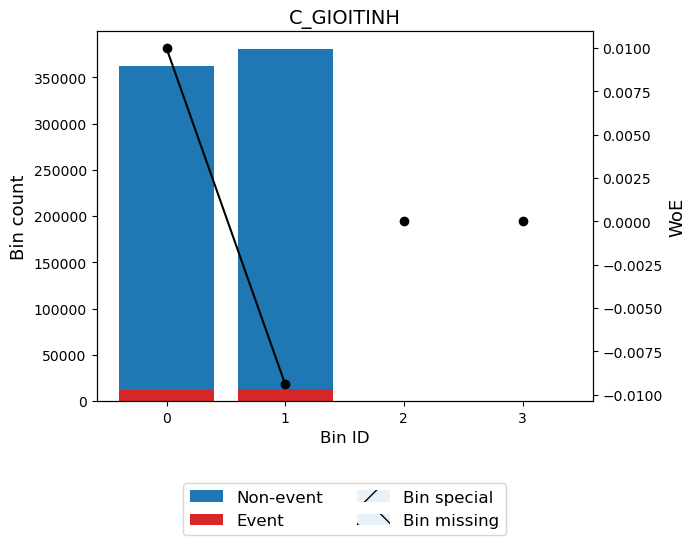


Processing: TRINHDO
   -> STATUS: OPTIMAL
   -> IV: 0.0190
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[4.0, 3.0]",167603,0.225713,162967,4636,0.027661,0.209951,0.009032,0.001127
1,"[2.0, nan]",363047,0.488921,351026,12021,0.033111,0.024461,0.000289,0.000036
2,[1.0],211898,0.285366,203380,8518,0.040199,-0.17685,0.009699,0.001211
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.019021,0.002374


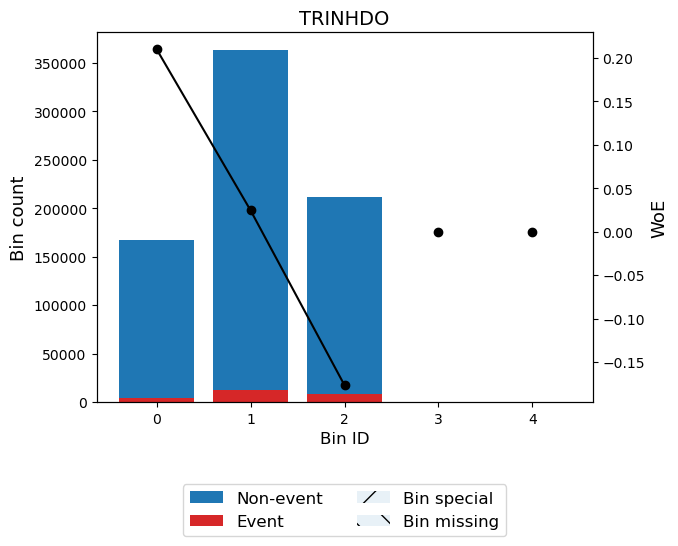


Processing: TTHONNHAN
   -> STATUS: OPTIMAL
   -> IV: 0.0193
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[Married],420035,0.565667,407480,12555,0.029890,0.130128,0.009019,0.001127
1,[Single],322513,0.434333,309893,12620,0.039130,-0.1488,0.010313,0.001288
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.019332,0.002415


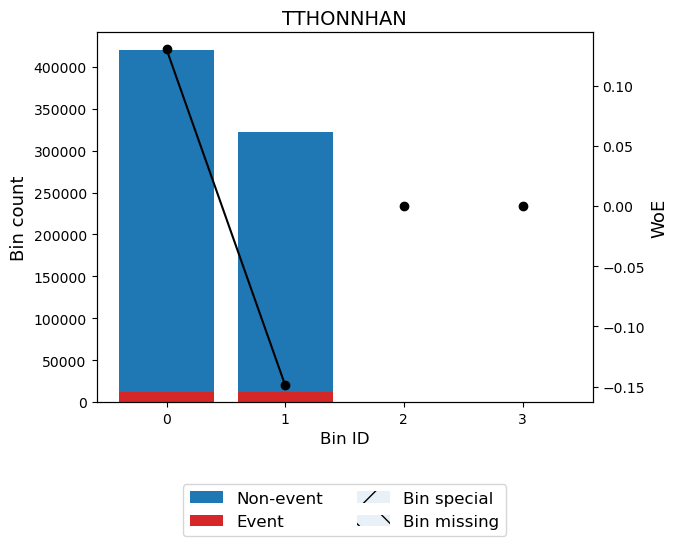


Processing: SOHUUNHA
   -> STATUS: OPTIMAL
   -> IV: 0.6464
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",456831,0.615221,433632,23199,0.050782,-0.421657,0.133681,0.016587
1,"[0.50, inf)",285717,0.384779,283741,1976,0.006916,1.617243,0.512726,0.057909
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.646407,0.074496


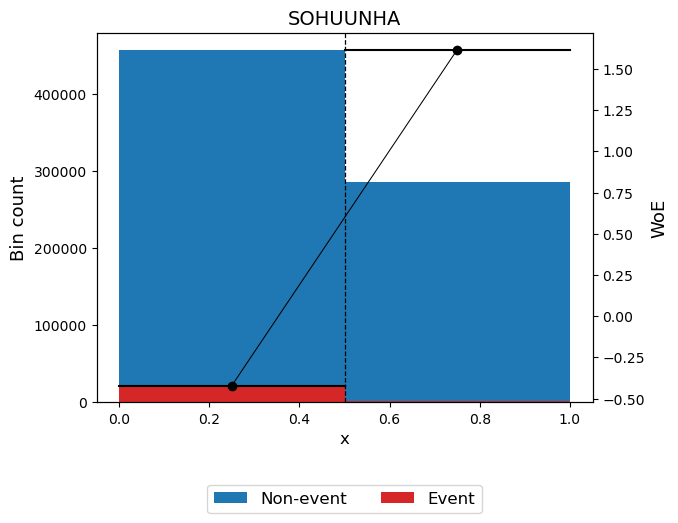


Processing: NHANVIENBIDV
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",742548,1.0,717373,25175,0.033904,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,742548,1.0,717373,25175,0.033904,,0.0,0.0


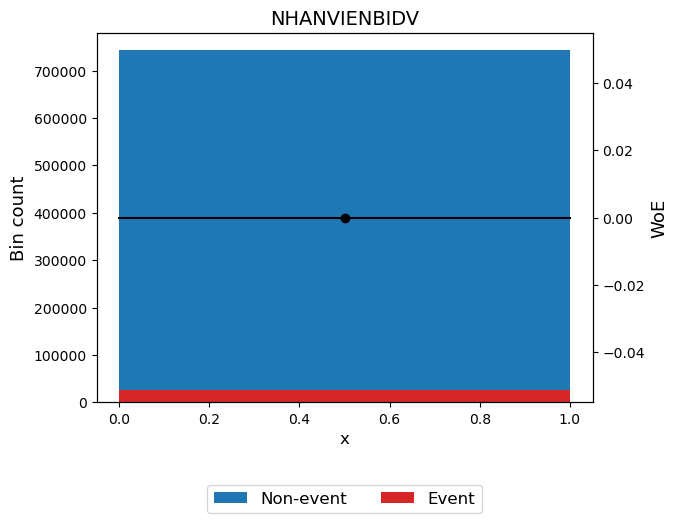


Processing: BASE_AUM
   -> STATUS: OPTIMAL
   -> IV: 0.0488
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 10074652.00)",370146,0.498481,355866,14280,0.038579,-0.13405,0.009539,1.191503e-03
1,"[10074652.00, 13492992.50)",93922,0.126486,90506,3416,0.036371,-0.072799,0.000694,8.667556e-05
2,"[13492992.50, 17729972.00)",76991,0.103685,74391,2600,0.033770,0.004079,0.000002,2.152355e-07
3,"[17729972.00, 26851690.00)",90533,0.121922,87832,2701,0.029834,0.132059,0.002000,2.498502e-04
4,"[26851690.00, inf)",110956,0.149426,108778,2178,0.019629,0.561158,0.036542,4.508777e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,742548,1.000000,717373,25175,0.033904,,0.048777,6.037021e-03


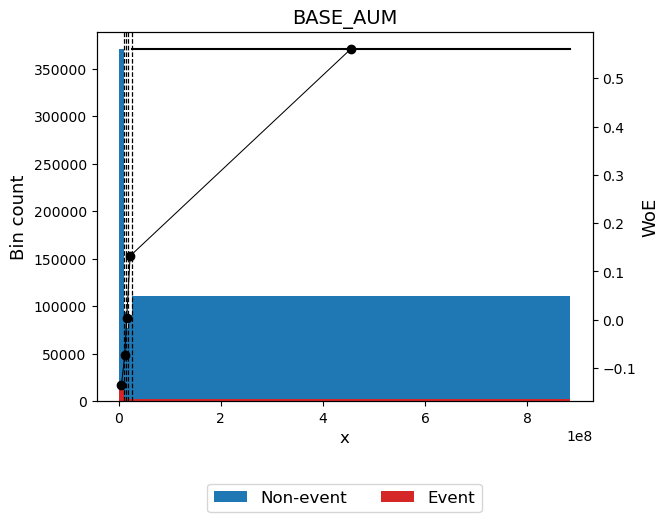


Processing: TUOI
   -> STATUS: OPTIMAL
   -> IV: 0.0643
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 27.50)",96802,0.130365,91679,5123,0.052922,-0.465191,0.035214,0.004362
1,"[27.50, 34.50)",159644,0.214995,153526,6118,0.038323,-0.12711,0.003687,0.000461
2,"[34.50, 37.50)",88575,0.119285,85607,2968,0.033508,0.012134,0.000017,0.000002
3,"[37.50, 47.50)",268434,0.361504,260621,7813,0.029106,0.157534,0.008342,0.001042
4,"[47.50, inf)",129093,0.173851,125940,3153,0.024424,0.337707,0.016991,0.002114
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.064251,0.007981


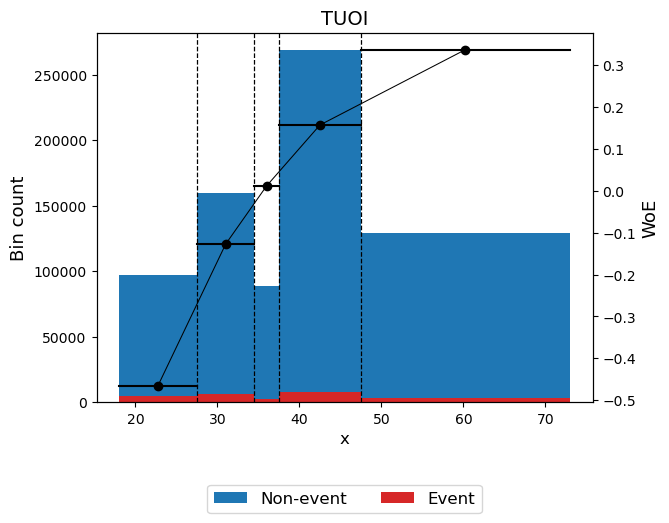


Processing: INCOME
   -> STATUS: OPTIMAL
   -> IV: 0.0293
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 16524906.00)",98094,0.132105,93798,4296,0.043795,-0.266285,0.010623,0.001324
1,"[16524906.00, 18707767.00)",82263,0.110785,79114,3149,0.038280,-0.12594,0.001864,0.000233
2,"[18707767.00, 23024346.00)",189545,0.255263,182759,6786,0.035802,-0.056438,0.000835,0.000104
3,"[23024346.00, 27145214.00)",142132,0.191411,137609,4523,0.031823,0.065496,0.000797,0.000100
4,"[27145214.00, inf)",193473,0.260553,188351,5122,0.026474,0.255018,0.015072,0.001879
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,37041,0.049884,35742,1299,0.035069,-0.035013,0.000062,0.000008
Totals,,742548,1.000000,717373,25175,0.033904,,0.029252,0.003647


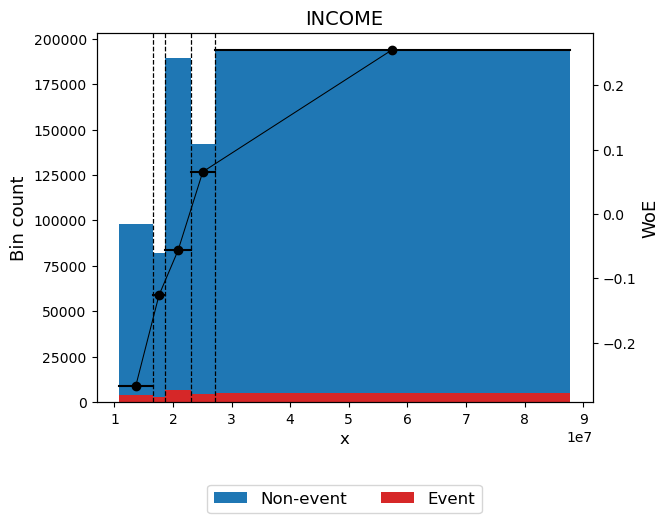


Processing: CBAL
   -> STATUS: OPTIMAL
   -> IV: 1.5816
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 197453544.00)",156035,0.210135,155789,246,0.001577,3.101182,0.643168,0.058505
1,"[197453544.00, 318472896.00)",204219,0.275025,202643,1576,0.007717,1.506811,0.331314,0.037893
2,"[318472896.00, 465887776.00)",178322,0.240149,173681,4641,0.026026,0.272546,0.015742,0.001962
3,"[465887776.00, 664582720.00)",117793,0.158634,110332,7461,0.063340,-0.65594,0.093514,0.011484
4,"[664582720.00, inf)",86179,0.116058,74928,11251,0.130554,-1.453674,0.497831,0.057270
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,1.581568,0.167114


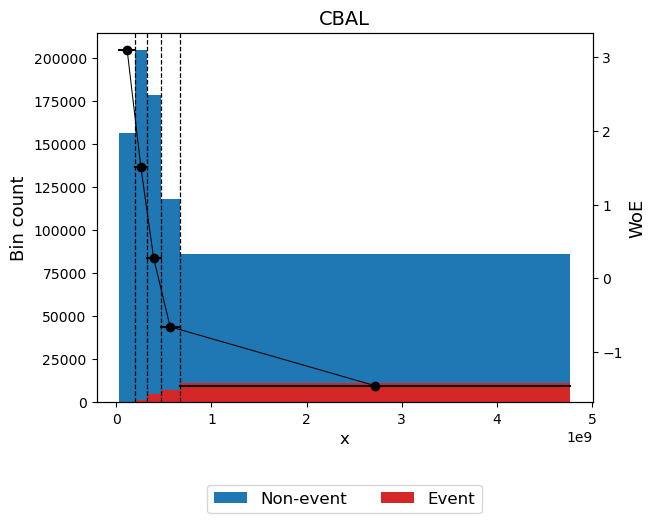


Processing: CBALORG
   -> STATUS: OPTIMAL
   -> IV: 1.5684
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 215692824.00)",154403,0.207937,154165,238,0.001541,3.123764,0.641772,0.058161
1,"[215692824.00, 350117776.00)",206226,0.277728,204632,1594,0.007729,1.505222,0.334062,0.038214
2,"[350117776.00, 517461584.00)",182049,0.245168,177133,4916,0.027004,0.234661,0.012119,0.001511
3,"[517461584.00, 706201600.00)",104922,0.141300,98407,6515,0.062094,-0.63474,0.077192,0.009490
4,"[706201600.00, inf)",94948,0.127868,83036,11912,0.125458,-1.408017,0.503250,0.058176
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,1.568395,0.165553


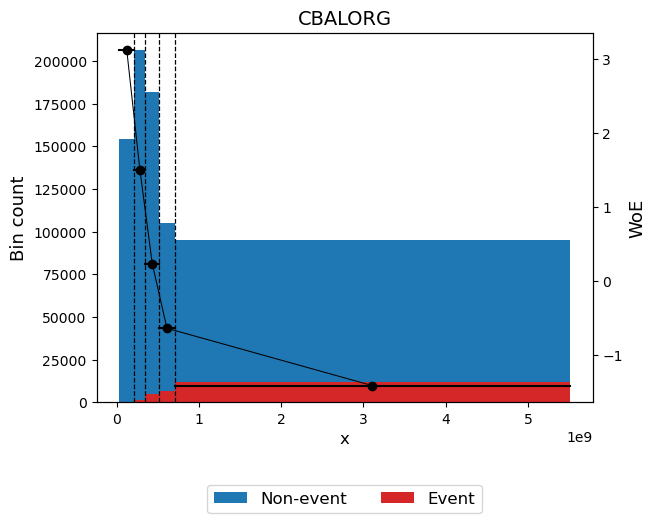


Processing: AFLIMT_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.2352
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 585052928.00)",216830,0.292008,212406,4424,0.020403,0.521711,0.062792,0.007761
1,"[585052928.00, 708405184.00)",163903,0.220731,160040,3863,0.023569,0.374235,0.026064,0.003239
2,"[708405184.00, 859440160.00)",148591,0.200110,144136,4455,0.029982,0.126986,0.003043,0.000380
3,"[859440160.00, 1088049024.00)",104369,0.140555,99662,4707,0.045100,-0.297011,0.014270,0.001777
4,"[1088049024.00, inf)",108855,0.146597,101129,7726,0.070975,-0.777939,0.129076,0.015740
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.235245,0.028897


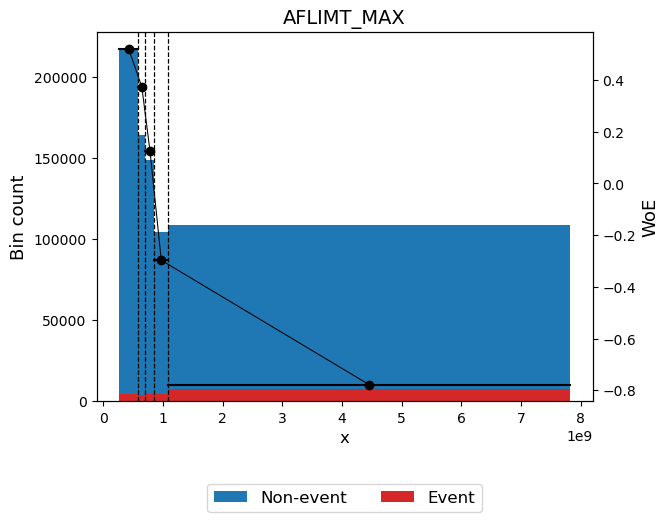


Processing: AFLIMT_MIN
   -> STATUS: OPTIMAL
   -> IV: 0.2352
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 526547616.00)",216830,0.292008,212406,4424,0.020403,0.521711,0.062792,0.007761
1,"[526547616.00, 637564672.00)",163903,0.220731,160040,3863,0.023569,0.374235,0.026064,0.003239
2,"[637564672.00, 773496128.00)",148591,0.200110,144136,4455,0.029982,0.126986,0.003043,0.000380
3,"[773496128.00, 979244096.00)",104369,0.140555,99662,4707,0.045100,-0.297011,0.014270,0.001777
4,"[979244096.00, inf)",108855,0.146597,101129,7726,0.070975,-0.777939,0.129076,0.015740
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.235245,0.028897


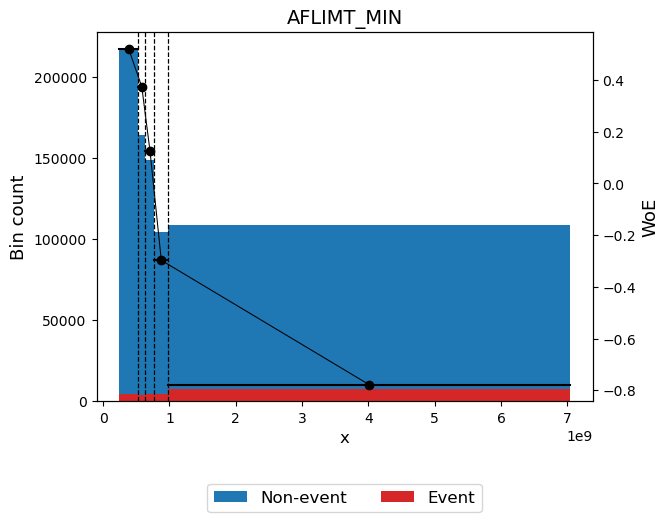


Processing: AFLIMT_AVG
   -> STATUS: OPTIMAL
   -> IV: 0.2352
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 555800256.00)",216830,0.292008,212406,4424,0.020403,0.521711,0.062792,0.007761
1,"[555800256.00, 672984928.00)",163903,0.220731,160040,3863,0.023569,0.374235,0.026064,0.003239
2,"[672984928.00, 816468160.00)",148591,0.200110,144136,4455,0.029982,0.126986,0.003043,0.000380
3,"[816468160.00, 1033646560.00)",104369,0.140555,99662,4707,0.045100,-0.297011,0.014270,0.001777
4,"[1033646560.00, inf)",108855,0.146597,101129,7726,0.070975,-0.777939,0.129076,0.015740
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.235245,0.028897


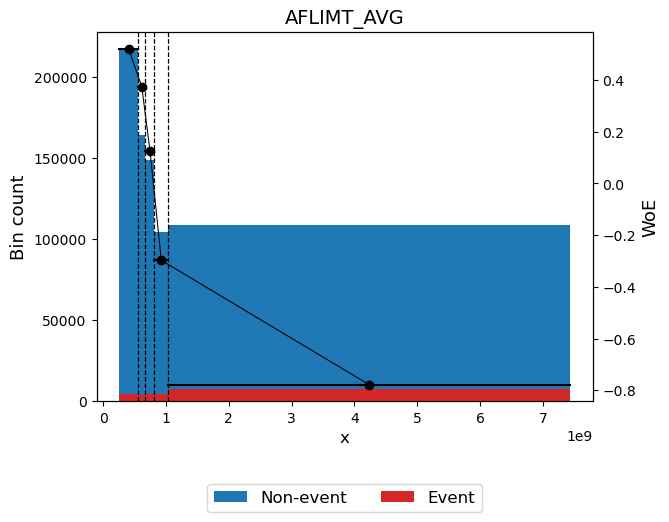


Processing: CBAL_AVG
   -> STATUS: OPTIMAL
   -> IV: 1.5013
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 201815008.00)",168644,0.227115,168317,327,0.001939,2.8939,0.641406,0.060353
1,"[201815008.00, 326532480.00)",207195,0.279032,205322,1873,0.009040,1.347294,0.285376,0.033197
2,"[326532480.00, 471673472.00)",167700,0.225844,162919,4781,0.028509,0.178859,0.006653,0.000830
3,"[471673472.00, 689832000.00)",119663,0.161152,111875,7788,0.065083,-0.684946,0.105073,0.012883
4,"[689832000.00, inf)",79346,0.106856,68940,10406,0.131147,-1.45889,0.462827,0.053213
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,1.501335,0.160477


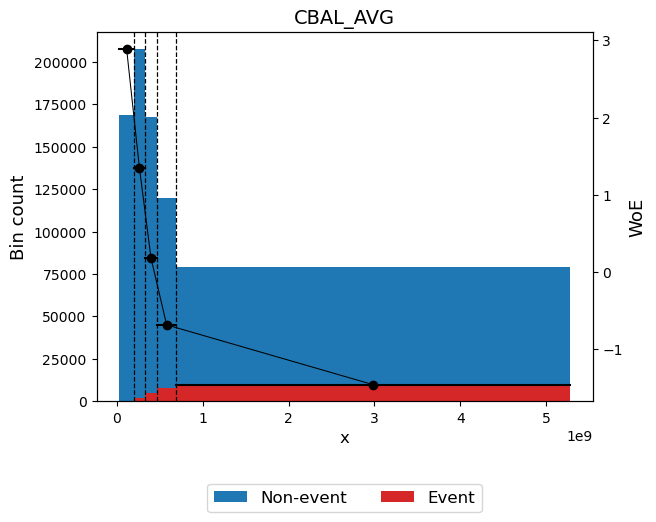


Processing: CBAL_MAX
   -> STATUS: OPTIMAL
   -> IV: 1.5038
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 244680912.00)",171577,0.231065,171238,339,0.001976,2.875065,0.647567,0.061118
1,"[244680912.00, 392605184.00)",204441,0.275324,202585,1856,0.009078,1.342991,0.280248,0.032615
2,"[392605184.00, 559317856.00)",162158,0.218380,157624,4534,0.027960,0.198863,0.007880,0.000983
3,"[559317856.00, 827798400.00)",124802,0.168073,116788,8014,0.064214,-0.670574,0.104296,0.012798
4,"[827798400.00, inf)",79570,0.107158,69138,10432,0.131105,-1.458518,0.463813,0.053329
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,1.503804,0.160843


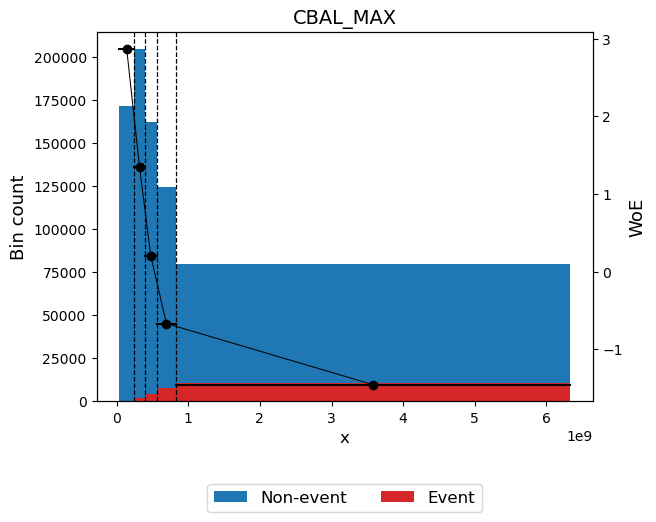


Processing: CBAL_MIN
   -> STATUS: OPTIMAL
   -> IV: 1.5013
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 161452008.00)",168644,0.227115,168317,327,0.001939,2.8939,0.641406,0.060353
1,"[161452008.00, 261225992.00)",207195,0.279032,205322,1873,0.009040,1.347294,0.285376,0.033197
2,"[261225992.00, 377338784.00)",167700,0.225844,162919,4781,0.028509,0.178859,0.006653,0.000830
3,"[377338784.00, 551865600.00)",119663,0.161152,111875,7788,0.065083,-0.684946,0.105073,0.012883
4,"[551865600.00, inf)",79346,0.106856,68940,10406,0.131147,-1.45889,0.462827,0.053213
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,1.501335,0.160477


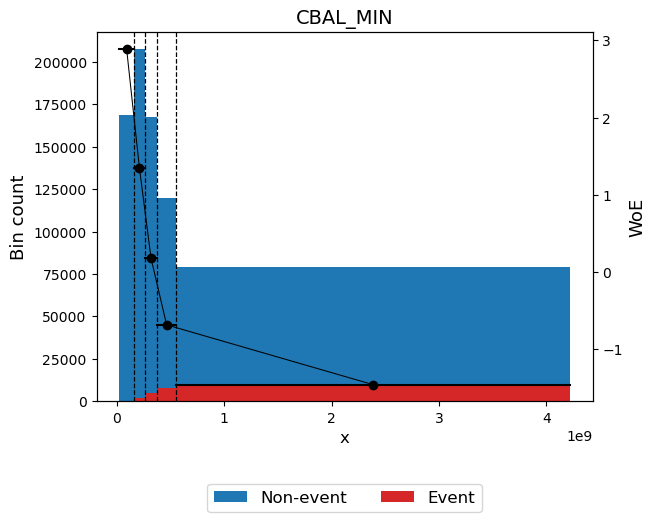


Processing: COLLATERAL_VALUE
   -> STATUS: OPTIMAL
   -> IV: 0.6444
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 8621842.50)",181681,0.244672,171744,9937,0.054695,-0.500005,0.077656,0.009607
1,"[8621842.50, 45805318.00)",128857,0.173534,122819,6038,0.046858,-0.337106,0.023137,0.002879
2,"[45805318.00, 2014565440.00)",205341,0.276536,203687,1654,0.008055,1.463643,0.319417,0.036706
3,"[2014565440.00, inf)",89593,0.120656,89061,532,0.005938,1.770689,0.182411,0.020223
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,137076,0.184602,130062,7014,0.051169,-0.429641,0.041807,0.005186
Totals,,742548,1.000000,717373,25175,0.033904,,0.644428,0.074601


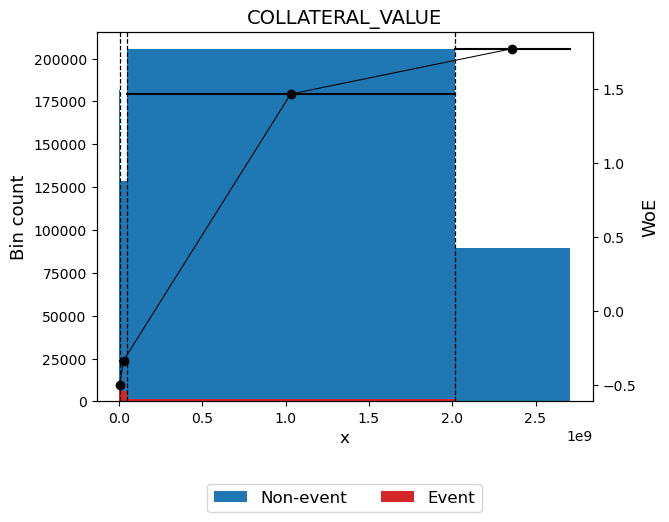


Processing: LTV
   -> STATUS: OPTIMAL
   -> IV: 1.7083
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 15.51)",130139,0.175260,130134,5,0.000038,6.817138,1.235299,0.062162
1,"[15.51, 25.93)",90369,0.121701,90218,151,0.001671,3.04296,0.364436,0.033469
2,"[25.93, inf)",522040,0.703039,497021,25019,0.047925,-0.360748,0.108574,0.013499
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,1.708309,0.109130


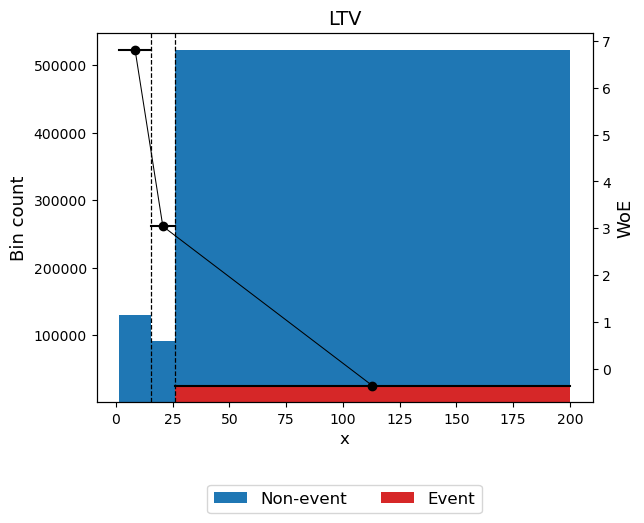


Processing: N_AVG_DEPOSIT_12M
   -> STATUS: OPTIMAL
   -> IV: 0.5077
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1610817.00)",170918,0.230178,159595,11323,0.066248,-0.703941,0.160006,0.019598
1,"[1610817.00, 2963139.00)",210630,0.283658,202168,8462,0.040175,-0.176231,0.009571,0.001195
2,"[2963139.00, 5022643.00)",147070,0.198061,143697,3373,0.022935,0.40216,0.026674,0.003312
3,"[5022643.00, 11162077.00)",137892,0.185701,136246,1646,0.011937,1.066369,0.132807,0.015856
4,"[11162077.00, inf)",76038,0.102401,75667,371,0.004879,1.968151,0.178592,0.019300
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.507650,0.059261


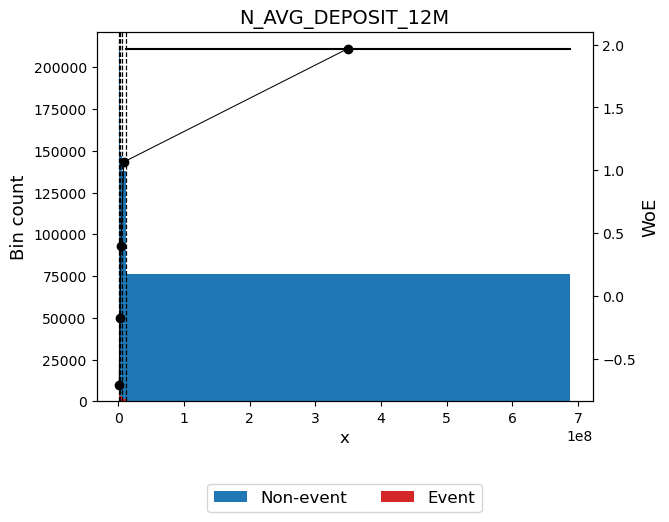


Processing: N_AVG_DEPOSIT_6M
   -> STATUS: OPTIMAL
   -> IV: 0.5077
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1610817.00)",170918,0.230178,159595,11323,0.066248,-0.703941,0.160006,0.019598
1,"[1610817.00, 2963139.00)",210630,0.283658,202168,8462,0.040175,-0.176231,0.009571,0.001195
2,"[2963139.00, 5022643.00)",147070,0.198061,143697,3373,0.022935,0.40216,0.026674,0.003312
3,"[5022643.00, 11162077.00)",137892,0.185701,136246,1646,0.011937,1.066369,0.132807,0.015856
4,"[11162077.00, inf)",76038,0.102401,75667,371,0.004879,1.968151,0.178592,0.019300
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.507650,0.059261


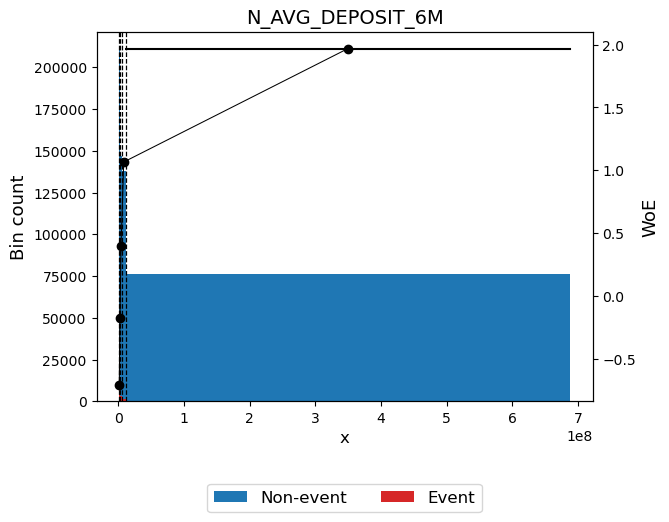


Processing: N_AVG_DD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.5076
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 322163.50)",170919,0.230179,159596,11323,0.066248,-0.703935,0.160004,0.019597
1,"[322163.50, 592627.50)",210629,0.283657,202167,8462,0.040175,-0.176236,0.009572,0.001195
2,"[592627.50, 1004528.50)",147070,0.198061,143697,3373,0.022935,0.40216,0.026674,0.003312
3,"[1004528.50, 2232415.00)",137892,0.185701,136246,1646,0.011937,1.066369,0.132807,0.015856
4,"[2232415.00, inf)",76038,0.102401,75667,371,0.004879,1.968151,0.178592,0.019300
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.507649,0.059261


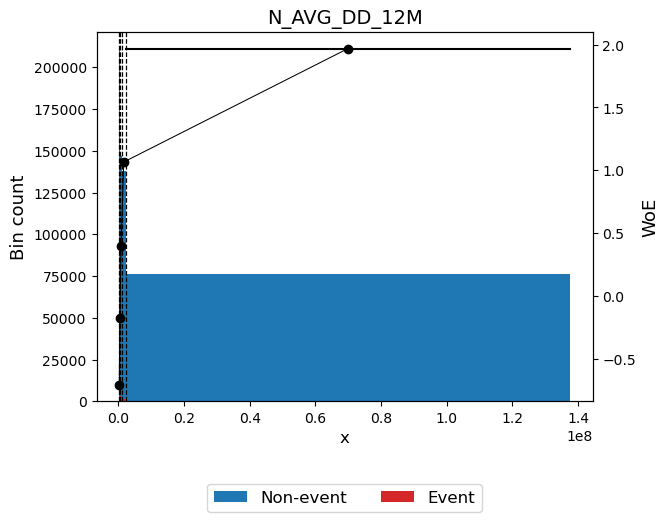


Processing: N_AVG_CD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.5077
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1288654.00)",170918,0.230178,159595,11323,0.066248,-0.703941,0.160006,0.019598
1,"[1288654.00, 2370511.50)",210630,0.283658,202168,8462,0.040175,-0.176231,0.009571,0.001195
2,"[2370511.50, 4018114.50)",147070,0.198061,143697,3373,0.022935,0.40216,0.026674,0.003312
3,"[4018114.50, 8929662.00)",137892,0.185701,136246,1646,0.011937,1.066369,0.132807,0.015856
4,"[8929662.00, inf)",76038,0.102401,75667,371,0.004879,1.968151,0.178592,0.019300
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.507650,0.059261


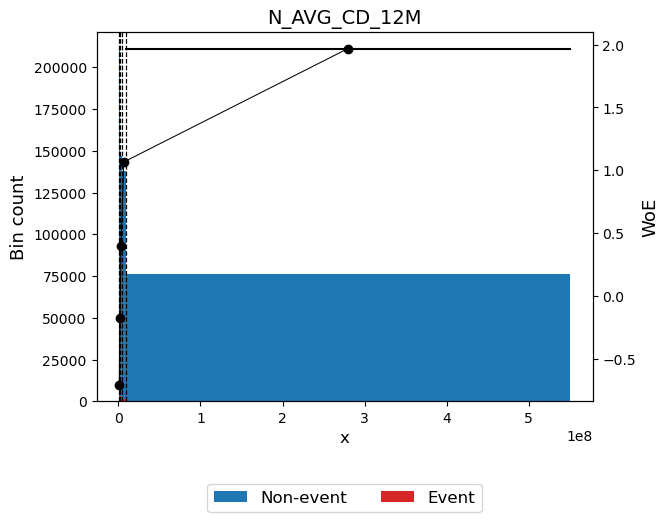


Processing: FLAG_SALARY_ACC
   -> STATUS: INFEASIBLE
   -> Skip: Không tạo được bin tối ưu

Processing: UTILIZATION_RATE
   -> STATUS: OPTIMAL
   -> IV: 2.2499
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.24)",85094,0.114597,85054,40,0.000470,4.312418,0.504442,0.037416
1,"[0.24, 0.40)",188746,0.254187,188421,325,0.001722,3.012864,0.752446,0.069445
2,"[0.40, 0.56)",188853,0.254331,187516,1337,0.007080,1.593691,0.331941,0.037593
3,"[0.56, 0.65)",105620,0.142240,100825,4795,0.045399,-0.303932,0.015172,0.001889
4,"[0.65, inf)",174235,0.234645,155557,18678,0.107200,-1.230079,0.645895,0.076003
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,2.249896,0.222346


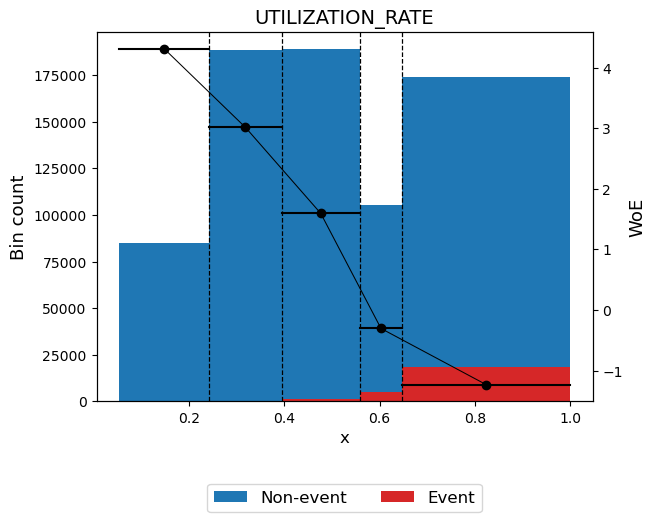


Processing: CNT_CREDIT_CARDS
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[4, 0](0..1), coeff=-41, offset=0), x[4, 1](0..1), IntAffine(expr=x[4, 2](0..1), coeff=19, offset=0), IntAffine(expr=x[4, 3](0..1), coeff=21, offset=0)), IntConstant(0)

Processing: AMT_CASH_ADVANCE_12M
   -> STATUS: OPTIMAL
   -> IV: 0.1430
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 97992420.00)",655376,0.882604,636643,18733,0.028584,0.176178,0.025256,0.003153
1,"[97992420.00, inf)",87172,0.117396,80730,6442,0.073900,-0.821473,0.117761,0.014320
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.143016,0.017473


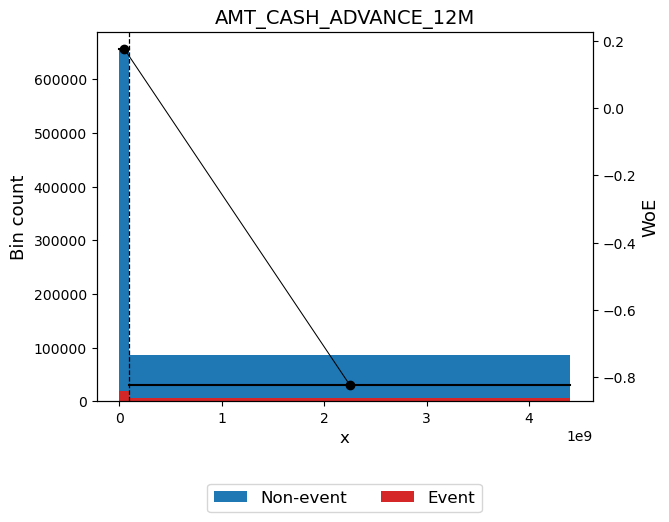


Processing: FLAG_CASH_ADVANCE
   -> STATUS: OPTIMAL
   -> IV: 0.1443
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",649439,0.874609,630998,18441,0.028395,0.182982,0.026914,0.003360
1,"[0.50, inf)",93109,0.125391,86375,6734,0.072324,-0.798216,0.117404,0.014298
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.144317,0.017657


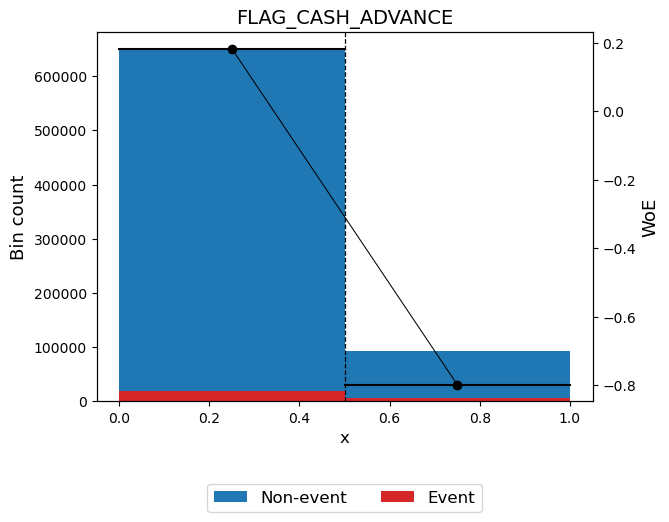


Processing: PCT_PAYMENT_TO_BALANCE
   -> STATUS: OPTIMAL
   -> IV: 0.2366
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.71)",81065,0.109171,75237,5828,0.071893,-0.791775,0.100255,0.012215
1,"[0.71, 1.02)",188490,0.253842,180292,8198,0.043493,-0.259057,0.019253,0.002400
2,"[1.02, 1.29)",228226,0.307355,221475,6751,0.029580,0.140875,0.005715,0.000714
3,"[1.29, 1.55)",160986,0.216802,157767,3219,0.019996,0.542304,0.049924,0.006165
4,"[1.55, inf)",83781,0.112829,82602,1179,0.014072,0.899623,0.061456,0.007433
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.236602,0.028926


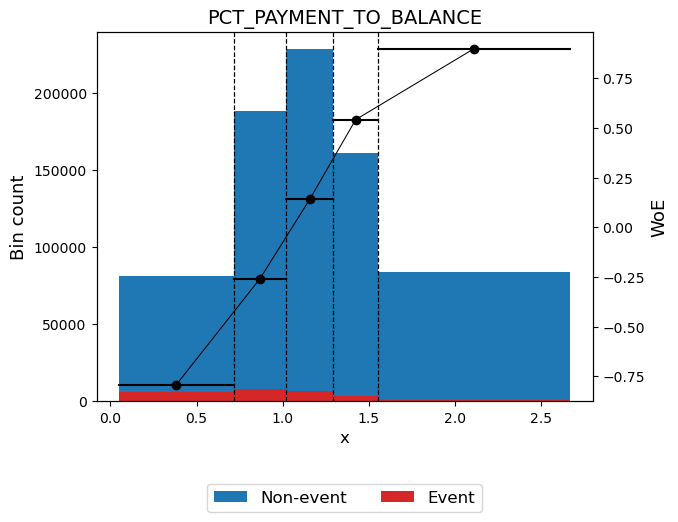


Processing: CNT_MIN_PAY_6M
   -> STATUS: OPTIMAL
   -> IV: 0.5527
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",573086,0.771783,562240,10846,0.018926,0.598388,0.211186,0.026011
1,"[0.50, inf)",169462,0.228217,155133,14329,0.084556,-0.967747,0.341541,0.041101
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.552727,0.067112


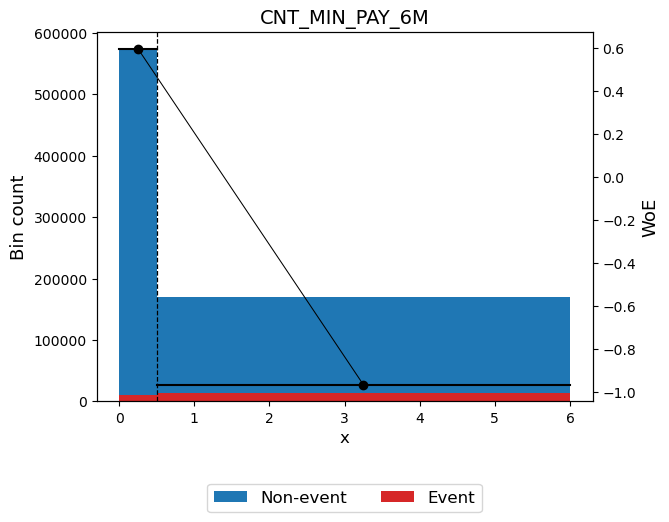


Processing: AVG_DAYS_PAST_DUE
   -> STATUS: OPTIMAL
   -> IV: 0.5207
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",574702,0.773959,563385,11317,0.019692,0.557913,0.187353,0.023120
1,"[0.50, 2.50)",76751,0.103362,71738,5013,0.065315,-0.688758,0.068273,0.008369
2,"[2.50, inf)",91095,0.122679,82250,8845,0.097096,-1.119833,0.265049,0.031502
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.520676,0.062991


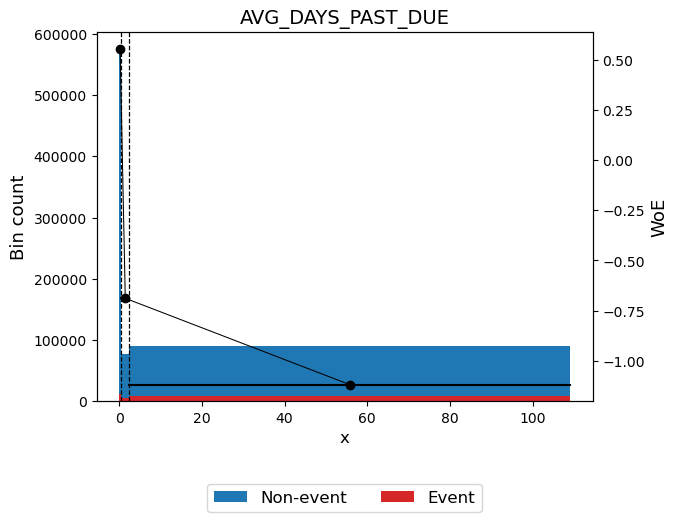


Processing: DTI_RATIO
   -> STATUS: OPTIMAL
   -> IV: 2.9297
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.96)",262367,0.353333,262080,287,0.001094,3.467178,1.227148,0.105014
1,"[0.96, 1.36)",189431,0.255109,188325,1106,0.005839,1.787675,0.390764,0.043230
2,"[1.36, 1.66)",110346,0.148605,108508,1838,0.016657,0.728401,0.056996,0.006971
3,"[1.66, 2.12)",106116,0.142908,100841,5275,0.049710,-0.399178,0.027529,0.003418
4,"[2.12, inf)",74288,0.100045,57619,16669,0.224383,-2.109443,1.227286,0.130094
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,2.929723,0.288729


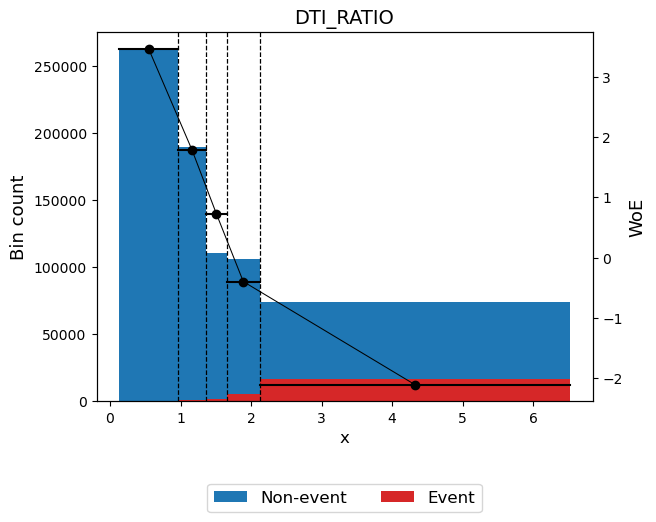


Processing: PTI_RATIO
   -> STATUS: OPTIMAL
   -> IV: 2.6116
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.48)",158666,0.213678,158575,91,0.000574,4.113379,0.894392,0.068606
1,"[0.48, 0.71)",173135,0.233163,172728,407,0.002351,2.700916,0.606657,0.058869
2,"[0.71, 0.96)",151926,0.204601,150584,1342,0.008833,1.370616,0.214643,0.024910
3,"[0.96, 1.34)",134610,0.181281,129253,5357,0.039796,-0.166377,0.005426,0.000678
4,"[1.34, inf)",124211,0.167277,106233,17978,0.144738,-1.573258,0.890519,0.101091
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,2.611638,0.254153


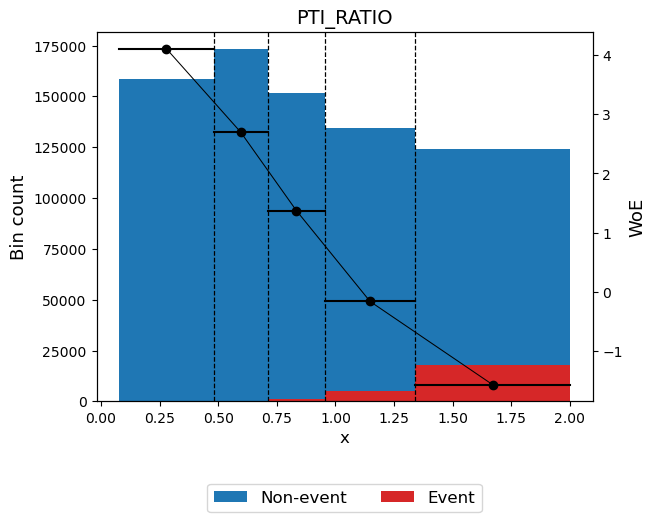


Processing: MOB
   -> STATUS: OPTIMAL
   -> IV: 0.0001
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 66.50)",397577,0.535423,383985,13592,0.034187,-0.008622,0.000040,0.000005
1,"[66.50, 90.50)",156400,0.210626,151132,5268,0.033683,0.006758,0.000010,0.000001
2,"[90.50, 102.50)",78042,0.105100,75421,2621,0.033584,0.009785,0.000010,0.000001
3,"[102.50, inf)",110529,0.148851,106835,3694,0.033421,0.014831,0.000033,0.000004
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.000092,0.000012


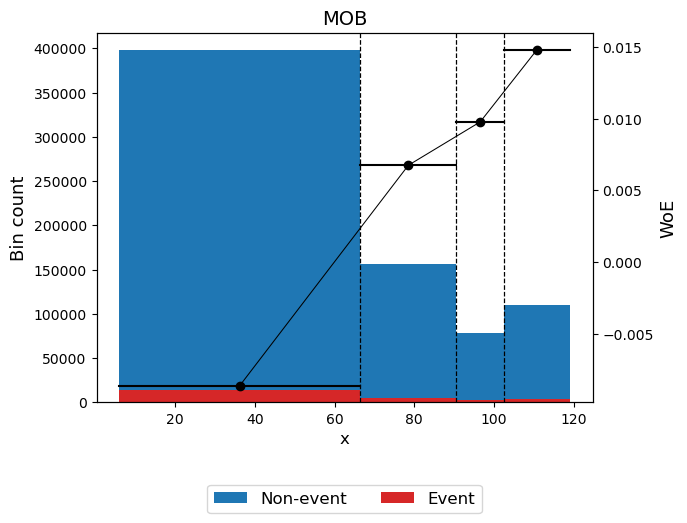


Processing: CNT_OTHER_PRODUCTS
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",446037,0.600684,430964,15073,0.033793,0.003375,0.000007,8.539300e-07
1,"[0.50, 1.50)",185639,0.250003,179327,6312,0.034001,-0.002986,0.000002,2.790443e-07
2,"[1.50, inf)",110872,0.149313,107082,3790,0.034184,-0.008516,0.000011,1.358822e-06
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,742548,1.000000,717373,25175,0.033904,,0.000020,2.491796e-06


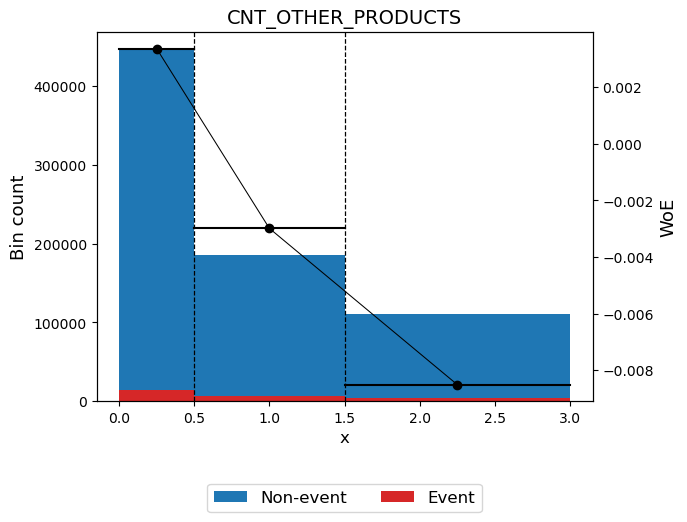


Processing: LIMIT_TO_INCOME
   -> STATUS: OPTIMAL
   -> IV: 1.3855
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 26.10)",109115,0.146947,107927,1188,0.010888,1.159439,0.119721,0.014179
1,"[26.10, 29.28)",174742,0.235328,172453,2289,0.013099,0.972265,0.145326,0.017482
2,"[29.28, 32.72)",196727,0.264935,193548,3179,0.016159,0.759214,0.108966,0.013303
3,"[32.72, 35.82)",180596,0.243211,177153,3443,0.019065,0.590926,0.065111,0.008022
4,"[35.82, inf)",81368,0.109579,66292,15076,0.185282,-1.868779,0.946422,0.103626
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,1.385546,0.156613


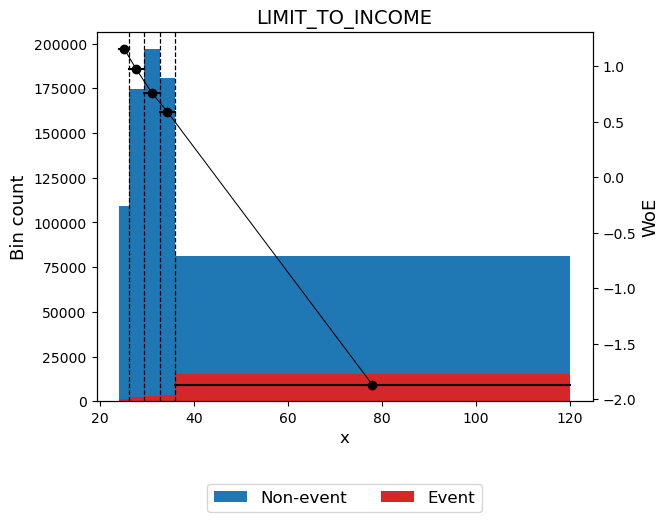


Processing: AMT_VAR_6M
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[5, 0](0..1), coeff=77, offset=0), IntAffine(expr=x[5, 1](0..1), coeff=-191, offset=0), IntAffine(expr=x[5, 2](0..1), coeff=-19, offset=0), IntAffine(expr=x[5, 3](0..1), coeff=112, offset=0), IntAffine(expr=x[5, 4](0..1), coeff=185, offset=0)), IntConstant(0)

Processing: CBAL_SHORTTERM_LOAN
   -> STATUS: OPTIMAL
   -> IV: 0.5124
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 141816920.00)",367071,0.494340,360746,6325,0.017231,0.69392,0.174611,0.021399
1,"[141816920.00, 204238272.00)",114112,0.153676,111482,2630,0.023048,0.397135,0.020228,0.002512
2,"[204238272.00, 270210752.00)",84263,0.113478,81470,2793,0.033146,0.023374,0.000061,0.000008
3,"[270210752.00, 386617952.00)",87548,0.117902,83296,4252,0.048568,-0.374733,0.019780,0.002458
4,"[386617952.00, inf)",89554,0.120604,80379,9175,0.102452,-1.179474,0.297702,0.035195
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.512382,0.061572


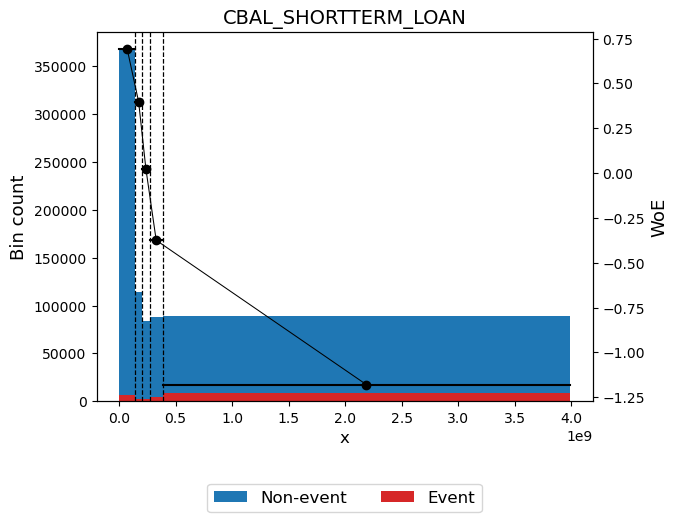


Processing: CBAL_LONGTERM_LOAN
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[11, 0](0..1), coeff=15076, offset=0), IntAffine(expr=x[11, 1](0..1), coeff=34075, offset=0), IntAffine(expr=x[11, 2](0..1), coeff=19540, offset=0), IntAffine(expr=x[11, 3](0..1), coeff=15195, offset=0), IntAffine(expr=x[11, 4](0..1), coeff=14792, offset=0), IntAffine(expr=x[11, 5](0..1), coeff=12343, offset=0), IntAffine(expr=x[11, 6](0..1), coeff=12249, offset=0), IntAffine(expr=x[11, 7](0..1), coeff=13320, offset=0), IntAffine(expr=x[11, 8](0..1), coeff=4704, offset=0), IntAffine(expr=x[11, 9](0..1), coeff=3135, offset=0), IntAffine(expr=x[11, 10](0..1), coeff=1074, offset=0)), IntConstant(0)

Processing: CNT_DPD_30PLUS_6M
   -> STATUS: INFEASIBLE
   

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[3],148689,0.200242,143765,4924,0.033116,0.024314,0.000117,1.463062e-05
1,[2],222976,0.300285,215383,7593,0.034053,-0.004553,0.000006,7.799035e-07
2,[4],74592,0.100454,72047,2545,0.034119,-0.006556,0.000004,5.414307e-07
3,[1],296291,0.399019,286178,10113,0.034132,-0.006952,0.000019,2.418566e-06
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,742548,1.000000,717373,25175,0.033904,,0.000147,1.837052e-05


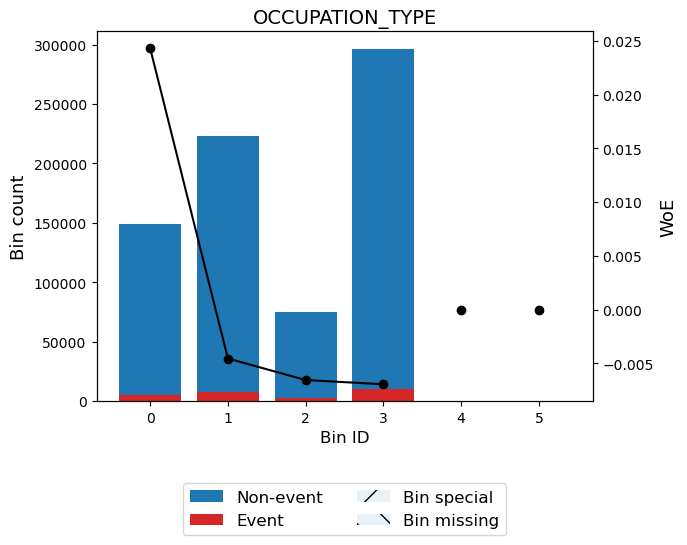


Processing: DURATION_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0013
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 48.00)",242034,0.325951,234188,7846,0.032417,0.046376,6.860762e-04,8.575184e-05
1,"[48.00, 90.00)",214429,0.288775,207165,7264,0.033876,0.00084,2.038959e-07,2.548699e-08
2,"[90.00, inf)",286085,0.385275,276020,10065,0.035182,-0.038335,5.764246e-04,7.204866e-05
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
Totals,,742548,1.000000,717373,25175,0.033904,,1.262705e-03,1.578260e-04


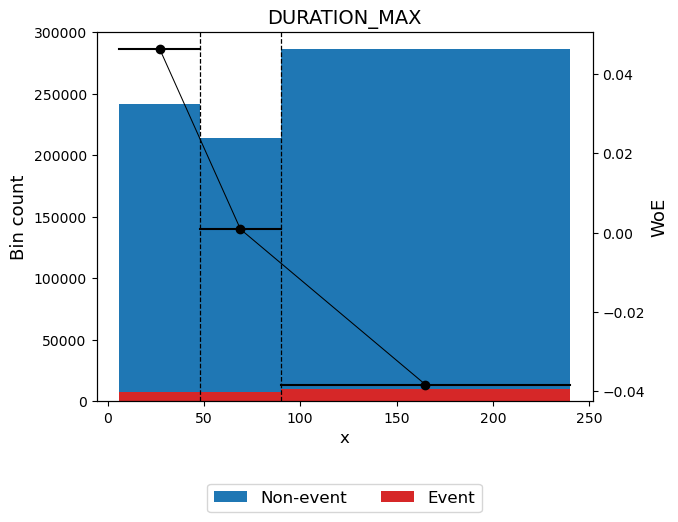


Processing: REMAINING_DURATION_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0020
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 15.50)",159515,0.214821,154483,5032,0.031546,0.074522,0.001152,1.440234e-04
1,"[15.50, 34.50)",248133,0.334164,239754,8379,0.033768,0.00414,0.000006,7.146644e-07
2,"[34.50, 92.50)",221501,0.298299,213826,7675,0.034650,-0.02255,0.000153,1.916118e-05
3,"[92.50, inf)",113399,0.152716,109310,4089,0.036059,-0.063857,0.000642,8.018792e-05
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,742548,1.000000,717373,25175,0.033904,,0.001953,2.440872e-04


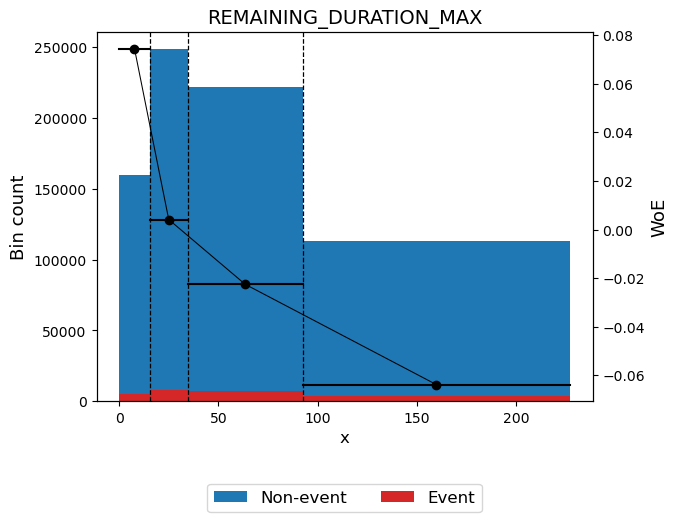


Processing: TIME_TO_OP_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0018
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 9.50)",99341,0.133784,96299,3042,0.030622,0.105198,0.001410,0.000176
1,"[9.50, 21.50)",167932,0.226156,162295,5637,0.033567,0.010319,0.000024,0.000003
2,"[21.50, 98.50)",390040,0.525272,376541,13499,0.034609,-0.021333,0.000241,0.000030
3,"[98.50, inf)",85235,0.114787,82238,2997,0.035162,-0.037739,0.000166,0.000021
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.001842,0.000230


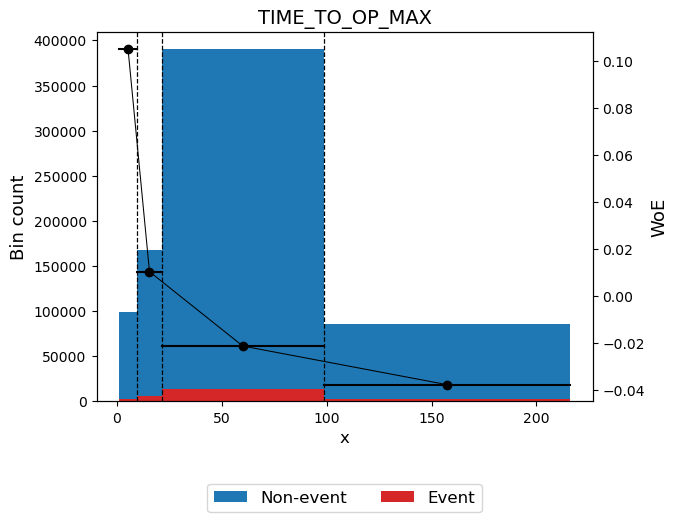


Processing: RATE_AVG
   -> STATUS: OPTIMAL
   -> IV: 0.5552
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 6.60)",138304,0.186256,137044,1260,0.009110,1.339446,0.188843,0.021985
1,"[6.60, 8.60)",239689,0.322793,235168,4521,0.018862,0.601822,0.089211,0.010986
2,"[8.60, 9.65)",131547,0.177156,127499,4048,0.030772,0.100141,0.001696,0.000212
3,"[9.65, 11.47)",155121,0.208904,147476,7645,0.049284,-0.390131,0.038270,0.004754
4,"[11.47, inf)",77887,0.104892,70186,7701,0.098874,-1.139946,0.237178,0.028140
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.555200,0.066077


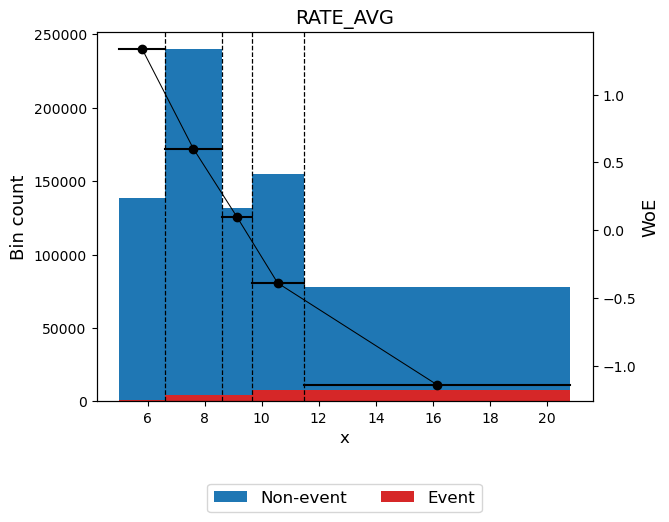


Processing: PURCOD_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0003
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[6, 2]",445405,0.599833,430510,14895,0.033441,0.0142,0.000120,0.000015
1,[1],149098,0.200792,143955,5143,0.034494,-0.01788,0.000065,0.000008
2,"[3, 9]",148045,0.199374,142908,5137,0.034699,-0.024013,0.000116,0.000015
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.000301,0.000038


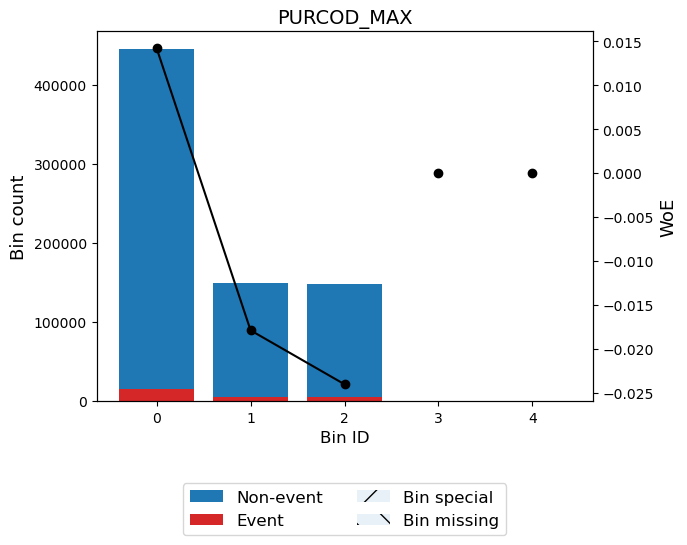


Processing: PURCOD_MIN
   -> STATUS: OPTIMAL
   -> IV: 0.0003
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[6, 2]",445405,0.599833,430510,14895,0.033441,0.0142,0.000120,0.000015
1,[1],149098,0.200792,143955,5143,0.034494,-0.01788,0.000065,0.000008
2,"[3, 9]",148045,0.199374,142908,5137,0.034699,-0.024013,0.000116,0.000015
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.000301,0.000038


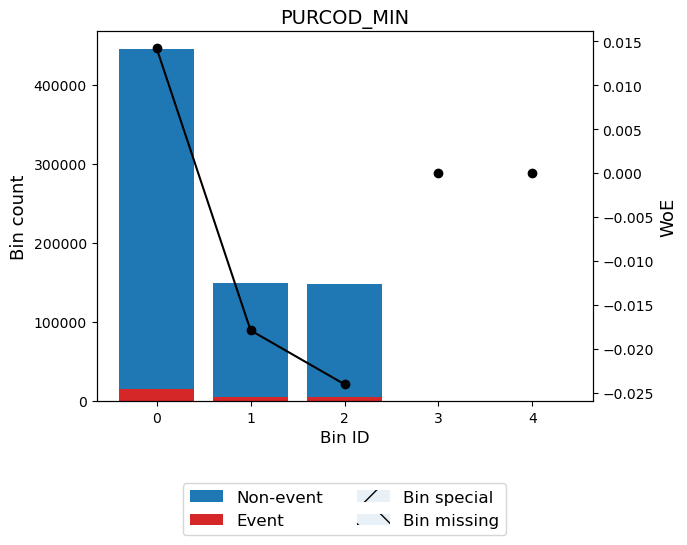


Processing: MAX_DPD_12M
   -> STATUS: OPTIMAL
   -> IV: 1.6762
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",227620,0.306539,226795,825,0.003624,2.266674,0.642321,0.066579
1,"[0.50, 2.50)",172597,0.232439,170835,1762,0.010209,1.224504,0.205900,0.024241
2,"[2.50, 8.50)",175871,0.236848,171495,4376,0.024882,0.318675,0.020789,0.002588
3,"[8.50, 16.50)",77660,0.104586,73705,3955,0.050927,-0.424654,0.023083,0.002864
4,"[16.50, inf)",88800,0.119588,74543,14257,0.160552,-1.695616,0.784061,0.087732
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,1.676154,0.184003


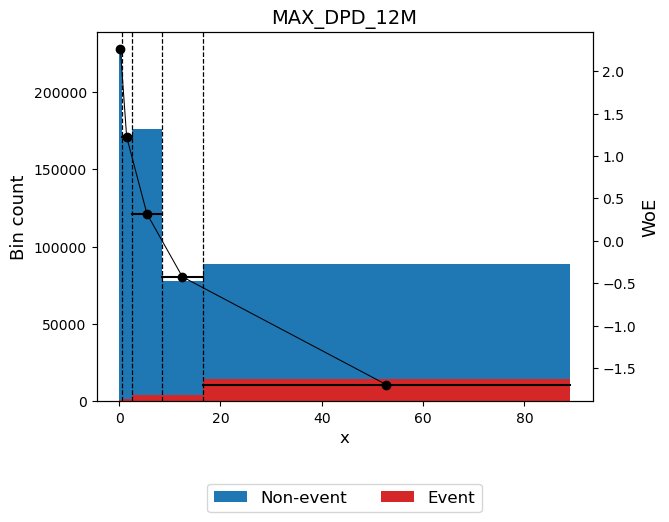


Processing: MAX_DPD_12M_OBS
   -> STATUS: OPTIMAL
   -> IV: 1.6762
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",227620,0.306539,226795,825,0.003624,2.266674,0.642321,0.066579
1,"[0.50, 2.50)",172597,0.232439,170835,1762,0.010209,1.224504,0.205900,0.024241
2,"[2.50, 8.50)",175871,0.236848,171495,4376,0.024882,0.318675,0.020789,0.002588
3,"[8.50, 16.50)",77660,0.104586,73705,3955,0.050927,-0.424654,0.023083,0.002864
4,"[16.50, inf)",88800,0.119588,74543,14257,0.160552,-1.695616,0.784061,0.087732
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,1.676154,0.184003


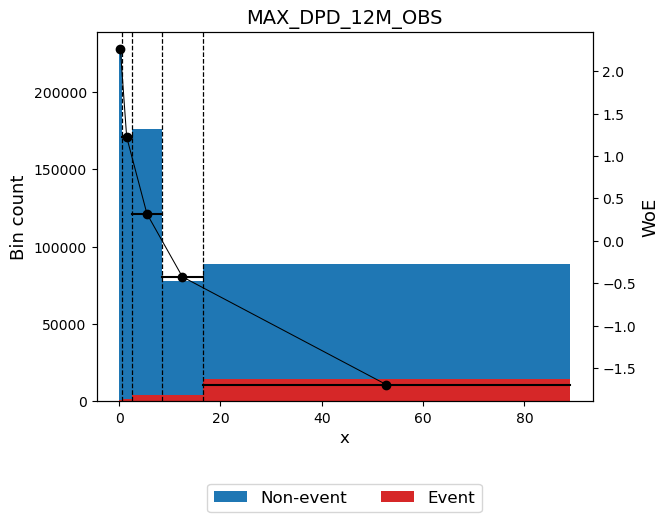


Processing: AVG_OD_DPD_12M
   -> STATUS: OPTIMAL
   -> IV: 1.3929
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",457515,0.616142,453648,3867,0.008452,1.415098,0.677505,0.078261
1,"[0.50, 1.50)",94591,0.127387,91923,2668,0.028206,0.189878,0.004208,0.000525
2,"[1.50, 3.50)",83239,0.112099,79409,3830,0.046012,-0.317998,0.013178,0.001640
3,"[3.50, inf)",107203,0.144372,92393,14810,0.138149,-1.518996,0.697961,0.079720
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,1.392852,0.160147


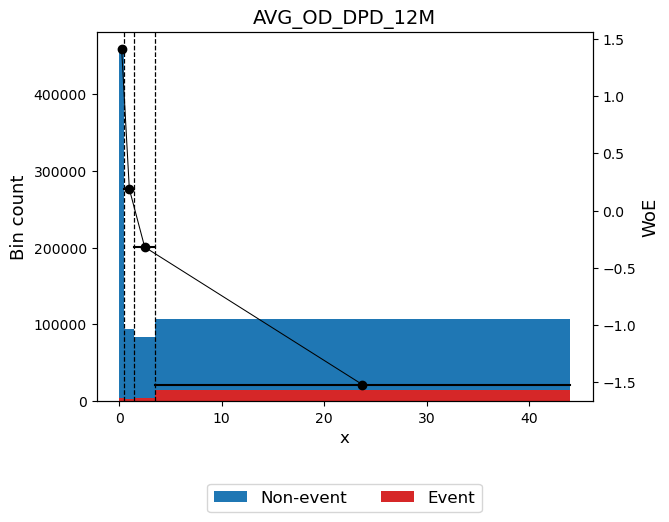


Processing: SUM_ALL_OD_12M
   -> STATUS: OPTIMAL
   -> IV: 1.6232
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",227620,0.306539,226795,825,0.003624,2.266674,0.642321,0.066579
1,"[0.50, 2.50)",121585,0.163740,120486,1099,0.009039,1.347388,0.167480,0.019483
2,"[2.50, 9.50)",157313,0.211856,154350,2963,0.018835,0.603276,0.058798,0.007240
3,"[9.50, 29.50)",139219,0.187488,133444,5775,0.041481,-0.209601,0.009092,0.001134
4,"[29.50, inf)",96811,0.130377,82298,14513,0.149911,-1.614442,0.745490,0.084225
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,1.623181,0.178661


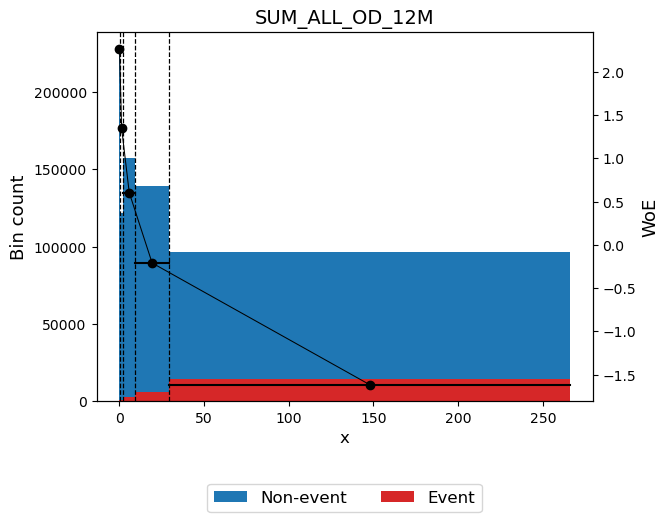


Processing: N_AVG_OVERDUE_CBAL_12M
   -> STATUS: OPTIMAL
   -> IV: 1.9483
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 98726772.00)",333254,0.448798,332184,1070,0.003211,2.388286,1.004402,0.102261
1,"[98726772.00, 136830960.00)",90657,0.122089,89908,749,0.008262,1.438059,0.137446,0.015838
2,"[136830960.00, 195771176.00)",119459,0.160877,116672,2787,0.023330,0.384656,0.019976,0.002482
3,"[195771176.00, 256338384.00)",81459,0.109702,77001,4458,0.054727,-0.500626,0.034915,0.004319
4,"[256338384.00, inf)",117719,0.158534,101608,16111,0.136860,-1.508124,0.751531,0.085942
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,1.948271,0.210843


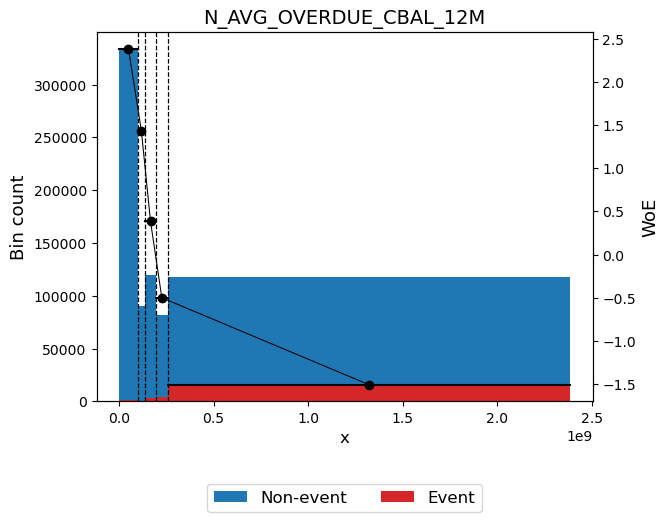


Processing: CBAL_TO_INC_12MON
   -> STATUS: OPTIMAL
   -> IV: 2.9297
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 11.58)",262367,0.353333,262080,287,0.001094,3.467178,1.227148,0.105014
1,"[11.58, 16.31)",189431,0.255109,188325,1106,0.005839,1.787675,0.390764,0.043230
2,"[16.31, 19.87)",110346,0.148605,108508,1838,0.016657,0.728401,0.056996,0.006971
3,"[19.87, 25.48)",106116,0.142908,100841,5275,0.049710,-0.399178,0.027529,0.003418
4,"[25.48, inf)",74288,0.100045,57619,16669,0.224383,-2.109443,1.227286,0.130094
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,2.929723,0.288729


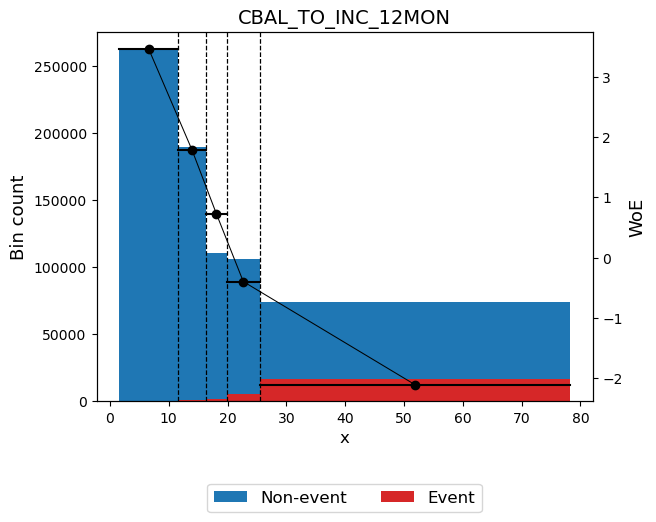


Processing: REAL_GDP_GROWTH_12M
   -> STATUS: OPTIMAL
   -> IV: 0.0509
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 4.97)",344249,0.463605,329841,14408,0.041853,-0.218917,0.024633,0.003073
1,"[4.97, inf)",398299,0.536395,387532,10767,0.027032,0.233568,0.026282,0.003278
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,742548,1.000000,717373,25175,0.033904,,0.050915,0.006351


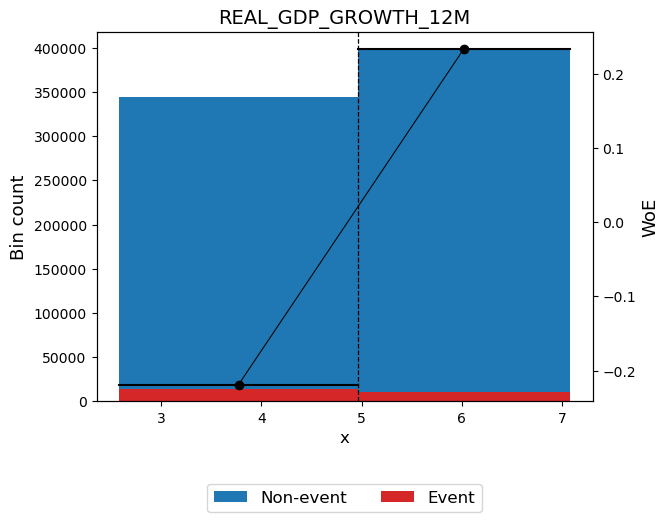

In [4]:
forced_cat_cols = [
    "C_GIOITINH", "TTHONNHAN", "PURCOD_MAX", "PURCOD_MIN",
    "OCCUPATION_TYPE", "TRINHDO", "MAX_NHOMNOCIC"
]

exclude_cols = [
    "SEGMENT", "SAMPLE_TYPE", "SOCIF", "year",
    "bad_current", "CASE_ID", target_col,
    "SNAPSHOT_DATE", "CURE_DATE"
]


candidates = [c for c in train.columns if c not in exclude_cols]

# --- BƯỚC LỌC THÔ (PRE-FILTER) ---
clean_candidates = []
for c in candidates:
    # 1. Loại biến chỉ có 1 giá trị duy nhất (Constant)
    if train[c].nunique() <= 1:
        print(f"Skip {c}: Biến hằng số (1 unique value)")
        continue
        
    # 2. Loại biến 100% Missing
    if train[c].isnull().all():
        print(f"Skip {c}: Biến 100% Null")
        continue
        
    clean_candidates.append(c)

# Cập nhật lại list cần chạy
candidates = clean_candidates

binning_results = {}

for feature in candidates:
    print(f"\nProcessing: {feature}")

    try:
        # Xác định loại biến
        is_categorical = feature in forced_cat_cols or \
                         (not pd.api.types.is_numeric_dtype(train[feature]))

        x_clean = train[feature].values 
        dtype_input = "numerical"
        
        if is_categorical:
            dtype_input = "categorical"
            x_clean = train[feature].astype(str).values

        optb = OptimalBinning(
            name=feature,
            dtype=dtype_input,
            solver="cp",
            monotonic_trend='auto_asc_desc',
            max_n_bins=5,
            prebinning_method='cart',
            divergence='iv',
            min_n_bins=2,
            min_bin_size=0.1
        )

        optb.fit(x_clean, train[target_col])

        print(f"   -> STATUS: {optb.status}")

        if optb.status in ["OPTIMAL", "FEASIBLE"]:
            optb.binning_table.build()
            # Lưu lại kết quả
            binning_results[feature] = optb
 
            # IV
            print(f"   -> IV: {optb.binning_table.iv:.4f}")

            # Hiển thị bảng
            print("   -> Chi tiết các Bin:")
            display(optb.binning_table.build())

            # Vẽ WOE
            try:
                # 1. Xóa plot cũ
                plt.close('all')
                
                # 2. Xử lý tiêu đề cho gọn
                plot_title = f"Var: {feature} | IV: {optb.binning_table.iv:.4f}"
                
                # 3. Vẽ hình dựa trên loại biến
                if dtype_input == "numerical":
                    # Biến số: Vẽ style="actual" để thấy xu hướng tăng/giảm rõ ràng
                    optb.binning_table.plot(metric="woe", style="actual", add_special=True)
                else:
                    # Biến category: KHÔNG dùng style="actual", chỉ vẽ cột mặc định
                    optb.binning_table.plot(metric="woe", add_special=True)
                
                # 4. Hiển thị
                plt.show()
                plt.close() # Đóng ngay

            except Exception as e_plot:
                print(f"   -> Lỗi vẽ hình: {e_plot}")

        else:
            print("   -> Skip: Không tạo được bin tối ưu")

    except Exception as e:
        print(f"   -> ERROR: {e}")

TỔNG HỢP KẾT QUẢ VÀ KIỂM TRA CHẤT LƯỢNG BIẾN

In [5]:
summary_data = []

for feature, optb in binning_results.items():
    # 1. Lấy bảng binning chi tiết
    bt = optb.binning_table.build()
    
    # --- SỬA LỖI TẠI ĐÂY ---
    # Chuyển cột Bin sang string trước khi so sánh để tránh lỗi với biến Category (list)
    bt_clean = bt[bt['Bin'].astype(str) != 'Totals']
    
    # Chỉ xét các bin có dữ liệu (Count > 0)
    valid_bins = bt_clean[bt_clean['Count'] > 0]
    
    if valid_bins.empty:
        continue

    # 2. Tính toán các chỉ số
    iv_value = optb.binning_table.iv
    min_bin_pct = valid_bins['Count (%)'].min() # Tỷ lệ % của bin nhỏ nhất
    max_bin_pct = valid_bins['Count (%)'].max() # Tỷ lệ % của bin lớn nhất
    n_bins = len(valid_bins)

    # 3. Xác định xu hướng (Trend) với PD (Event Rate)
    trend_observed = "N/A (Categorical)"
    
    if optb.dtype == "numerical":
        # Lấy các bin số thực (loại bỏ Special/Missing)
        # Convert sang str để so sánh an toàn
        mask_special = valid_bins['Bin'].astype(str).isin(['Special', 'Missing'])
        numeric_bins = valid_bins[~mask_special]
        
        if len(numeric_bins) >= 2:
            first_er = numeric_bins.iloc[0]['Event rate']
            last_er = numeric_bins.iloc[-1]['Event rate']
            
            if last_er > first_er:
                trend_observed = "Tăng (Thuận)"
            elif last_er < first_er:
                trend_observed = "Giảm (Nghịch)"
            else:
                trend_observed = "Không rõ (Flat)"

    # 4. Gắn cờ cảnh báo (Flag Issues)
    issues = []
    if iv_value < 0.02: 
        issues.append("Weak IV")
    if min_bin_pct < 0.05: 
        issues.append("Small Bin (<5%)")
    if optb.status != "OPTIMAL":
        issues.append(f"Status: {optb.status}")
    if n_bins < 2:
        issues.append("Single Bin")

    # 5. Đưa vào danh sách tổng hợp
    summary_data.append({
        "Variable": feature,
        "IV": iv_value,
        "Trend_PD": trend_observed,
        "Min_Bin_Pct": min_bin_pct,
        "Max_Bin_Pct": max_bin_pct,
        "Num_Bins": n_bins,
        "Quality_Check": ", ".join(issues) if issues else "PASS"
    })

# --- HIỂN THỊ KẾT QUẢ ---
if summary_data:
    df_summary = pd.DataFrame(summary_data)
    
    # Sắp xếp theo IV giảm dần
    df_summary = df_summary.sort_values("IV", ascending=False).reset_index(drop=True)
    
    # Hiển thị full danh sách
    pd.set_option('display.max_rows', None)
    
    print(f"Tổng số biến đạt yêu cầu: {len(df_summary)}")
    
    # Hiển thị bảng bình thường với format số đẹp
    display(df_summary.style.format({
        "IV": "{:.4f}",
        "Min_Bin_Pct": "{:.2%}",
        "Max_Bin_Pct": "{:.2%}"
    }))
    
else:
    print("Không có biến nào được xử lý thành công.")

Tổng số biến đạt yêu cầu: 48


,Variable,IV,Trend_PD,Min_Bin_Pct,Max_Bin_Pct,Num_Bins,Quality_Check
0,CBAL_TO_INC_12MON,2.9297,Tăng (Thuận),10.00%,100.00%,6,PASS
1,DTI_RATIO,2.9297,Tăng (Thuận),10.00%,100.00%,6,PASS
2,PTI_RATIO,2.6116,Tăng (Thuận),16.73%,100.00%,6,PASS
3,UTILIZATION_RATE,2.2499,Tăng (Thuận),11.46%,100.00%,6,PASS
4,N_AVG_OVERDUE_CBAL_12M,1.9483,Tăng (Thuận),10.97%,100.00%,6,PASS
5,LTV,1.7083,Tăng (Thuận),12.17%,100.00%,4,PASS
6,MAX_DPD_12M_OBS,1.6762,Tăng (Thuận),10.46%,100.00%,6,PASS
7,MAX_DPD_12M,1.6762,Tăng (Thuận),10.46%,100.00%,6,PASS
8,SUM_ALL_OD_12M,1.6232,Tăng (Thuận),13.04%,100.00%,6,PASS
9,CBAL,1.5816,Tăng (Thuận),11.61%,100.00%,6,PASS


Multivariate ana

LOẠI BỎ BIẾN YẾU

In [6]:
# 1. Xác định danh sách biến cần loại (những biến không PASS)
# Lấy từ bảng df_summary đã tạo ở bước trước
drop_list = df_summary[df_summary['Quality_Check'] != 'PASS']['Variable'].tolist()

if drop_list:
    print(f"-> Phát hiện {len(drop_list)} biến yếu/lỗi cần loại bỏ.")
    
    # 2. Xóa khỏi dictionary lưu trữ kết quả
    for var in drop_list:
        if var in binning_results:
            del binning_results[var] # Lệnh xóa trực tiếp khỏi bộ nhớ
            
    print(f"-> Đã xóa thành công: {drop_list}")
else:
    print("-> Tuyệt vời! Tất cả các biến đều đạt chuẩn, không cần xóa gì cả.")

# 3. Cập nhật lại danh sách biến tốt để dùng cho Bước 4
final_vars_step3 = list(binning_results.keys())

print(f"\n>>> SỐ LƯỢNG BIẾN CÒN LẠI ĐỂ CHẠY ĐA CỘNG TUYẾN: {len(final_vars_step3)}")

-> Phát hiện 13 biến yếu/lỗi cần loại bỏ.
-> Đã xóa thành công: ['INCOME', 'TTHONNHAN', 'TRINHDO', 'REMAINING_DURATION_MAX', 'TIME_TO_OP_MAX', 'DURATION_MAX', 'PURCOD_MAX', 'PURCOD_MIN', 'OCCUPATION_TYPE', 'C_GIOITINH', 'MOB', 'CNT_OTHER_PRODUCTS', 'NHANVIENBIDV']

>>> SỐ LƯỢNG BIẾN CÒN LẠI ĐỂ CHẠY ĐA CỘNG TUYẾN: 35


KIỂM TRA ĐA CỘNG TUYẾN


[BƯỚC 4] Kiểm tra tương quan và loại bỏ biến (Threshold = 0.7, Ưu tiên DTI)...
  -> Đã đưa biến 'DTI_RATIO' lên vị trí ưu tiên số 1.
  -> Đang tính toán WoE cho 35 biến...
  -> Bắt đầu lọc tương quan...

=== KẾT QUẢ SAU KHI LỌC ĐA CỘNG TUYẾN ===
Tổng biến đầu vào: 35
Số biến giữ lại:   16
Số biến bị loại:   19

>>> DANH SÁCH BIẾN BỊ LOẠI (CORRELATION > 0.7):


,Variable,IV,Reason
0,CBAL_TO_INC_12MON,2.9297,Corr với DTI_RATIO (r=1.00)
1,PTI_RATIO,2.6116,Corr với DTI_RATIO (r=0.78)
2,UTILIZATION_RATE,2.2499,Corr với DTI_RATIO (r=0.88)
3,MAX_DPD_12M_OBS,1.6762,Corr với MAX_DPD_12M (r=1.00)
4,SUM_ALL_OD_12M,1.6232,Corr với MAX_DPD_12M (r=0.96)
5,CBAL,1.5816,Corr với DTI_RATIO (r=0.75)
6,CBALORG,1.5684,Corr với DTI_RATIO (r=0.74)
7,CBAL_MAX,1.5038,Corr với DTI_RATIO (r=0.74)
8,CBAL_AVG,1.5013,Corr với DTI_RATIO (r=0.74)
9,CBAL_MIN,1.5013,Corr với DTI_RATIO (r=0.74)



>>> DANH SÁCH BIẾN CUỐI CÙNG (FINAL SELECTION):


,Variable,IV,Min_Bin_Pct,Max_Bin_Pct
0,DTI_RATIO,2.9297,10.00%,100.00%
1,N_AVG_OVERDUE_CBAL_12M,1.9483,10.97%,100.00%
2,LTV,1.7083,12.17%,100.00%
3,MAX_DPD_12M,1.6762,10.46%,100.00%
4,LIMIT_TO_INCOME,1.3855,10.96%,100.00%
5,RATE_AVG,0.5552,10.49%,100.00%
6,CNT_MIN_PAY_6M,0.5527,22.82%,100.00%
7,AVG_DAYS_PAST_DUE,0.5207,10.34%,100.00%
8,CBAL_SHORTTERM_LOAN,0.5124,11.35%,100.00%
9,N_AVG_DEPOSIT_12M,0.5077,10.24%,100.00%


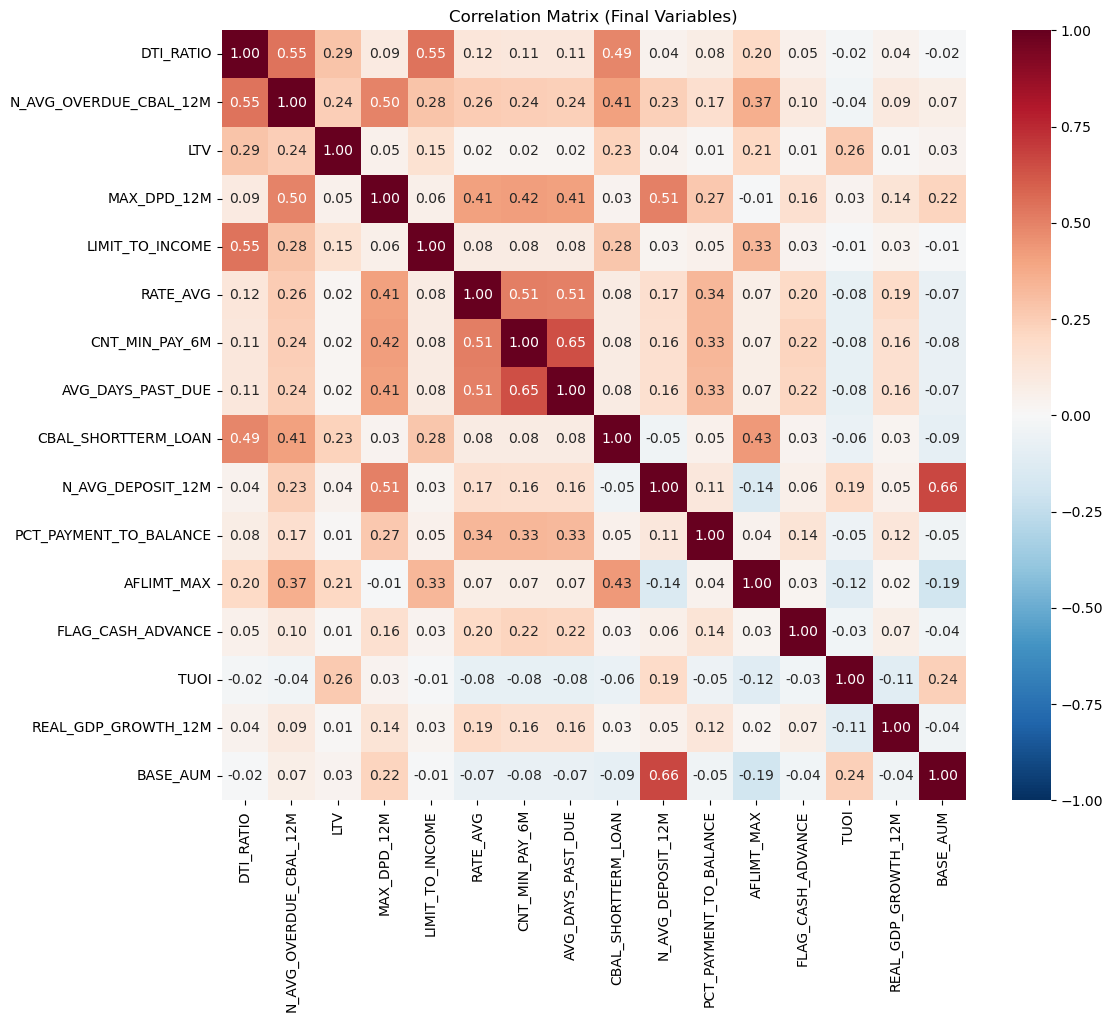

In [7]:
print("\n[BƯỚC 4] Kiểm tra tương quan và loại bỏ biến (Threshold = 0.7, Ưu tiên DTI)...")

# --- 1. CHUẨN BỊ DANH SÁCH BIẾN ---
# Lấy danh sách các biến còn lại trong dictionary (đã được clean ở bước 3.5)
available_vars = list(binning_results.keys())

# Lấy IV để sắp xếp giảm dần
var_iv_list = []
for v in available_vars:
    iv = binning_results[v].binning_table.iv
    var_iv_list.append((v, iv))

# Sort: IV cao xếp trước
var_iv_list.sort(key=lambda x: x[1], reverse=True)
sorted_features = [x[0] for x in var_iv_list]

# --- LOGIC ƯU TIÊN: ĐƯA DTI_RATIO LÊN ĐẦU ---
priority_var = "DTI_RATIO"
if priority_var in sorted_features:
    sorted_features.remove(priority_var)
    sorted_features.insert(0, priority_var)
    print(f"  -> Đã đưa biến '{priority_var}' lên vị trí ưu tiên số 1.")
else:
    print(f"  -> Cảnh báo: '{priority_var}' không nằm trong danh sách biến (có thể đã bị loại vì IV quá thấp).")

# --- 2. TÍNH TOÁN WOE ---
print(f"  -> Đang tính toán WoE cho {len(sorted_features)} biến...")
df_woe = pd.DataFrame()

for feature in sorted_features:
    try:
        optb = binning_results[feature]
        
        # Preprocessing (Quan trọng: phải khớp với lúc train)
        is_categorical = (optb.dtype == "categorical")
        x_raw = train[feature].copy()
        
        if is_categorical:
            x_clean = x_raw.astype(str).replace('nan', 'Missing').fillna("Missing")
        else:
            x_clean = x_raw # Numerical
            
        # Transform sang WoE
        df_woe[feature] = optb.transform(x_clean, metric="woe")
        
    except Exception as e:
        print(f"  -> Lỗi transform biến {feature}: {e}")

# --- 3. TÍNH MA TRẬN TƯƠNG QUAN & LỌC ---
corr_matrix = df_woe.corr(method='pearson')

kept_vars = []
dropped_log = []

print(f"  -> Bắt đầu lọc tương quan...")

for candidate in sorted_features:
    is_kept = True
    reason = "Initial"
    
    # So sánh biến ứng viên với các biến ĐÃ ĐƯỢC GIỮ
    for existing_var in kept_vars:
        # Lấy hệ số tương quan
        r = corr_matrix.loc[candidate, existing_var]
        
        # Nếu tương quan quá cao (>= 0.7)
        if abs(r) >= 0.7:
            is_kept = False
            reason = f"Corr với {existing_var} (r={r:.2f})"
            break # Dừng kiểm tra, loại luôn
            
    if is_kept:
        kept_vars.append(candidate)
    else:
        # Lưu log
        candidate_iv = binning_results[candidate].binning_table.iv
        dropped_log.append({
            "Variable": candidate,
            "IV": candidate_iv,
            "Reason": reason
        })

# ============================================================
# HIỂN THỊ KẾT QUẢ
# ============================================================
print(f"\n=== KẾT QUẢ SAU KHI LỌC ĐA CỘNG TUYẾN ===")
print(f"Tổng biến đầu vào: {len(sorted_features)}")
print(f"Số biến giữ lại:   {len(kept_vars)}")
print(f"Số biến bị loại:   {len(dropped_log)}")

# 1. Danh sách bị loại
if dropped_log:
    print("\n>>> DANH SÁCH BIẾN BỊ LOẠI (CORRELATION > 0.7):")
    df_dropped = pd.DataFrame(dropped_log)
    display(df_dropped.style.format({"IV": "{:.4f}"}))

# 2. Danh sách giữ lại
print("\n>>> DANH SÁCH BIẾN CUỐI CÙNG (FINAL SELECTION):")

# Tạo bảng tổng hợp thông tin cho các biến được giữ
final_summary_data = []
for v in kept_vars:
    optb = binning_results[v]
    
    # Lấy thông tin binning để hiển thị cho đẹp
    bt = optb.binning_table.build()
    bt_clean = bt[bt['Bin'].astype(str) != 'Totals']
    valid_bins = bt_clean[bt_clean['Count'] > 0]
    
    final_summary_data.append({
        "Variable": v,
        "IV": optb.binning_table.iv,
        "Min_Bin_Pct": valid_bins['Count (%)'].min() if not valid_bins.empty else 0,
        "Max_Bin_Pct": valid_bins['Count (%)'].max() if not valid_bins.empty else 0
    })

df_final = pd.DataFrame(final_summary_data)
# Sort lại theo IV giảm dần để dễ nhìn
df_final = df_final.sort_values("IV", ascending=False).reset_index(drop=True)

display(df_final.style.format({
    "IV": "{:.4f}",
    "Min_Bin_Pct": "{:.2%}",
    "Max_Bin_Pct": "{:.2%}"
}))

# 3. Vẽ Heatmap (Chỉ vẽ nếu số lượng biến <= 30 để nhìn cho rõ)
if len(kept_vars) <= 30:
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_woe[kept_vars].corr(), annot=True, fmt=".2f", cmap="RdBu_r", vmin=-1, vmax=1)
    plt.title("Correlation Matrix (Final Variables)")
    plt.show()

LASSO REGRESSION 

In [8]:
# ============================================================
# CẤU HÌNH TOÀN CỤC (CHỈNH 1 LẦN Ở ĐÂY)
# ============================================================
TARGET_LASSO_VARS = 15      # Số lượng biến giữ lại sau Lasso
BRUTE_FORCE_K_MIN = 8       # Số biến tối thiểu trong mô hình final
BRUTE_FORCE_K_MAX = 15      # Số biến tối đa
N_JOBS            = 15      # Số luồng CPU chạy song song
TARGET_COL        = target_col # Tên biến target (đã define ở đầu notebook)

# ============================================================
# BƯỚC 5: LỌC BIẾN BẰNG LASSO (PHIÊN BẢN SILENT)
# ============================================================
print(f"\n[BƯỚC 5] Chạy Lasso Regression (Giữ lại Top {TARGET_LASSO_VARS} biến)...")

# 1. Chuẩn bị dữ liệu WoE (Chạy ngầm)
X_woe_lasso = pd.DataFrame()
for feature in kept_vars:
    try:
        optb = binning_results[feature]
        x_raw = train[feature].astype(str).replace('nan', 'Missing').fillna("Missing") if optb.dtype == "categorical" else train[feature]
        X_woe_lasso[feature] = optb.transform(x_raw, metric="woe")
    except: pass

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_woe_lasso)
y = train[TARGET_COL]

# 2. Ranking biến (Chạy 1 lần duy nhất)
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42)
lr.fit(X_scaled, y)
coefs_abs = np.abs(lr.coef_[0])

# 3. Lấy Top biến
df_imp = pd.DataFrame({'Variable': kept_vars, 'Imp': coefs_abs}).sort_values('Imp', ascending=False)
final_vars_lasso = df_imp.head(TARGET_LASSO_VARS)['Variable'].tolist()

# Đảm bảo DTI (Force keep)
if "DTI_RATIO" in kept_vars and "DTI_RATIO" not in final_vars_lasso:
    final_vars_lasso.pop()
    final_vars_lasso.append("DTI_RATIO")

kept_vars = final_vars_lasso # Cập nhật biến toàn cục
print(f"  -> Đã xong. Danh sách {len(kept_vars)} biến được chọn: {kept_vars}")


[BƯỚC 5] Chạy Lasso Regression (Giữ lại Top 15 biến)...
  -> Đã xong. Danh sách 15 biến được chọn: ['LTV', 'DTI_RATIO', 'MAX_DPD_12M', 'TUOI', 'N_AVG_OVERDUE_CBAL_12M', 'LIMIT_TO_INCOME', 'AFLIMT_MAX', 'FLAG_CASH_ADVANCE', 'N_AVG_DEPOSIT_12M', 'RATE_AVG', 'AVG_DAYS_PAST_DUE', 'CNT_MIN_PAY_6M', 'CBAL_SHORTTERM_LOAN', 'REAL_GDP_GROWTH_12M', 'PCT_PAYMENT_TO_BALANCE']


In [9]:
# ============================================================
# BƯỚC 6: CHUẨN BỊ DỮ LIỆU FINAL (TRANSFORM ALL)
# ============================================================
print(f"\n[BƯỚC 6] Transform toàn bộ dữ liệu (Train/OOS/OOT) sang WoE...")

def transform_woe_silent(df, cols, binning_dict):
    out = pd.DataFrame()
    for c in cols:
        optb = binning_dict[c]
        x = df[c].astype(str).replace('nan', 'Missing').fillna("Missing") if optb.dtype == "categorical" else df[c]
        out[c] = optb.transform(x, metric="woe")
    return out

X_train_final = transform_woe_silent(train, kept_vars, binning_results)
X_oos_final   = transform_woe_silent(oos, kept_vars, binning_results)
X_oot_final   = transform_woe_silent(oot, kept_vars, binning_results)
y_train_full  = train[TARGET_COL]

# Tính sẵn Std Dev để tính Weight
std_devs = X_train_final.std()
print("  -> Đã chuẩn bị xong dữ liệu.")


[BƯỚC 6] Transform toàn bộ dữ liệu (Train/OOS/OOT) sang WoE...
  -> Đã chuẩn bị xong dữ liệu.


In [10]:
# ============================================================
# BƯỚC 7: VÉT CẠN TỔ HỢP (BRUTE-FORCE OPTIMIZED)
# ============================================================
print(f"\n[BƯỚC 7] Chạy Brute-force ({BRUTE_FORCE_K_MIN}-{BRUTE_FORCE_K_MAX} biến) trên {N_JOBS} luồng CPU...")

# Worker Function
def process_combo(cols_idx, feature_names, X_data, y_data, stds):
    vars_names = feature_names[list(cols_idx)]
    X_sub = X_data[vars_names]
    
    # Fit
    clf = LogisticRegression(penalty='l2', C=1e9, solver='liblinear', random_state=42)
    clf.fit(X_sub, y_data)
    coefs = clf.coef_[0]
    
    # Check 1: Dấu
    if np.any(coefs >= 0): return None
    
    # Check 2: Weight (3% - 35%)
    imp = np.abs(coefs * stds[vars_names].values)
    total = imp.sum()
    if total == 0: return None
    w = (imp / total) * 100
    if np.any(w < 3) or np.any(w > 35): return None
    
    # Check 3: Gini > 50%
    pred = clf.predict_proba(X_sub)[:, 1]
    gini = 2 * roc_auc_score(y_data, pred) - 1
    if gini < 0.5: return None
    
    return (len(vars_names), list(vars_names), coefs, w, gini)

# Main Loop
feature_names_arr = np.array(kept_vars)
combos = []
for k in range(BRUTE_FORCE_K_MIN, min(BRUTE_FORCE_K_MAX, len(kept_vars)) + 1):
    combos.extend(itertools.combinations(range(len(kept_vars)), k))

print(f"  -> Tổng số mô hình cần kiểm tra: {len(combos)}")
print("  -> Đang xử lý (vui lòng chờ)...")

# Chạy song song (verbose=1: Chỉ hiện progress bar gọn gàng)
results = Parallel(n_jobs=N_JOBS, verbose=1)(
    delayed(process_combo)(c, feature_names_arr, X_train_final, y_train_full, std_devs) for c in combos
)

valid_models = [r for r in results if r is not None]
print(f"  -> Hoàn tất! Tìm thấy {len(valid_models)} mô hình đạt chuẩn.")


[BƯỚC 7] Chạy Brute-force (8-15 biến) trên 15 luồng CPU...
  -> Tổng số mô hình cần kiểm tra: 16384
  -> Đang xử lý (vui lòng chờ)...


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:   20.3s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:  1.6min
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:  3.9min
[Parallel(n_jobs=15)]: Done 770 tasks      | elapsed:  6.8min
[Parallel(n_jobs=15)]: Done 1220 tasks      | elapsed: 10.6min
[Parallel(n_jobs=15)]: Done 1770 tasks      | elapsed: 15.2min
[Parallel(n_jobs=15)]: Done 2420 tasks      | elapsed: 20.6min
[Parallel(n_jobs=15)]: Done 3170 tasks      | elapsed: 26.7min
[Parallel(n_jobs=15)]: Done 4020 tasks      | elapsed: 32.7min
[Parallel(n_jobs=15)]: Done 4970 tasks      | elapsed: 38.8min
[Parallel(n_jobs=15)]: Done 6020 tasks      | elapsed: 45.6min
[Parallel(n_jobs=15)]: Done 7170 tasks      | elapsed: 55.3min
[Parallel(n_jobs=15)]: Done 8420 tasks      | elapsed: 66.9min
[Parallel(n_jobs=15)]: Done 9770 tasks      | elapsed: 78.6min
[Parallel(n_jobs=15)]: Done 11220 tasks      

  -> Hoàn tất! Tìm thấy 104 mô hình đạt chuẩn.


[Parallel(n_jobs=15)]: Done 16384 out of 16384 | elapsed: 140.8min finished


In [11]:
# ============================================================
# BƯỚC 8: CHỌN MÔ HÌNH TỐT NHẤT & VALIDATE
# ============================================================
if valid_models:
    # Convert to DF & Sort
    df_res = pd.DataFrame(valid_models, columns=['Num_Vars', 'Vars', 'Coefs', 'Weights', 'Gini_Train'])
    df_res = df_res.sort_values('Gini_Train', ascending=False).reset_index(drop=True)
    
    # Lấy Best Model (Rank 1)
    best_row = df_res.iloc[0]
    best_vars = best_row['Vars']
    
    print(f"\n[BƯỚC 8] KẾT QUẢ FINAL (Mô hình Rank 1/Top {len(valid_models)})")
    print("-" * 60)
    print(f"Danh sách biến ({len(best_vars)}): {best_vars}")
    
    # Validate OOS/OOT
    def get_gini(X, y, model_cols, model_obj):
        # Lưu ý: model_obj là Logit của statsmodels nên cần add_constant
        X_new = sm.add_constant(X[model_cols])
        pred = model_obj.predict(X_new)
        return 2 * roc_auc_score(y, pred) - 1

    # Fit lại bằng Statsmodels để ra report đẹp
    X_train_best = sm.add_constant(X_train_final[best_vars])
    final_logit = sm.Logit(y_train_full, X_train_best).fit(disp=0)
    
    # Tính Gini các tập
    g_train = 2 * roc_auc_score(y_train_full, final_logit.predict(X_train_best)) - 1
    
    X_oos_best = sm.add_constant(X_oos_final[best_vars])
    g_oos = 2 * roc_auc_score(oos[TARGET_COL], final_logit.predict(X_oos_best)) - 1
    
    X_oot_best = sm.add_constant(X_oot_final[best_vars])
    g_oot = 2 * roc_auc_score(oot[TARGET_COL], final_logit.predict(X_oot_best)) - 1
    
    # In bảng kết quả gọn đẹp
    print("-" * 60)
    print(f"{'METRIC':<10} | {'VALUE':<10} | {'NOTES'}")
    print("-" * 60)
    print(f"{'Gini Train':<10} | {g_train:.2%}    |")
    print(f"{'Gini OOS':<10} | {g_oos:.2%}    | Diff: {g_train - g_oos:.2%}")
    print(f"{'Gini OOT':<10} | {g_oot:.2%}    | Diff: {g_train - g_oot:.2%}")
    print("-" * 60)
    
    if (g_train - g_oos > 0.1) or (g_train - g_oot > 0.1):
        print("⚠️ CẢNH BÁO: Có dấu hiệu Overfitting!")
    else:
        print("✅ KẾT QUẢ TỐT: Mô hình ổn định.")

    # In bảng hệ số và trọng số
    print("\n>>> CHI TIẾT BIẾN & TRỌNG SỐ:")
    res_detail = pd.DataFrame({
        'Variable': best_vars,
        'Coef': final_logit.params.drop('const').values,
        'P-value': final_logit.pvalues.drop('const').values,
        'Weight(%)': best_row['Weights']
    }).sort_values('Weight(%)', ascending=False)
    
    display(res_detail.style.format({
        'Coef': '{:.4f}', 'P-value': '{:.4f}', 'Weight(%)': '{:.2f}'
    }))
    
else:
    print("❌ Không tìm thấy mô hình nào thỏa mãn tiêu chí.")


[BƯỚC 8] KẾT QUẢ FINAL (Mô hình Rank 1/Top 104)
------------------------------------------------------------
Danh sách biến (8): [np.str_('MAX_DPD_12M'), np.str_('TUOI'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('LIMIT_TO_INCOME'), np.str_('FLAG_CASH_ADVANCE'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('CNT_MIN_PAY_6M'), np.str_('CBAL_SHORTTERM_LOAN')]
------------------------------------------------------------
METRIC     | VALUE      | NOTES
------------------------------------------------------------
Gini Train | 86.34%    |
Gini OOS   | 86.21%    | Diff: 0.13%
Gini OOT   | 87.22%    | Diff: -0.88%
------------------------------------------------------------
✅ KẾT QUẢ TỐT: Mô hình ổn định.

>>> CHI TIẾT BIẾN & TRỌNG SỐ:


,Variable,Coef,P-value,Weight(%)
0,MAX_DPD_12M,-0.8877,0.0000,32.58
2,N_AVG_OVERDUE_CBAL_12M,-0.5124,0.0000,21.63
3,LIMIT_TO_INCOME,-0.7767,0.0000,19.17
1,TUOI,-1.7285,0.0000,12.03
5,N_AVG_DEPOSIT_12M,-0.1640,0.0000,3.89
6,CNT_MIN_PAY_6M,-0.1995,0.0000,3.74
7,CBAL_SHORTTERM_LOAN,-0.1972,0.0000,3.55
4,FLAG_CASH_ADVANCE,-0.3688,0.0000,3.41


In [13]:
# ============================================================
# BƯỚC CUỐI (SỬA ĐỔI): Tự tạo ID nếu không có CASE_ID
# ============================================================

# 1. Reset index để lấy Index làm ID (đặt tên là CASE_ID cho thống nhất)
train_reset = train.reset_index().rename(columns={'index': 'CASE_ID'})
oos_reset   = oos.reset_index().rename(columns={'index': 'CASE_ID'})
oot_reset   = oot.reset_index().rename(columns={'index': 'CASE_ID'})

# Đánh dấu nguồn (để sau này tính Gini riêng)
train_reset['DATA_TYPE'] = 'TRAIN'
oos_reset['DATA_TYPE']   = 'OOS'
oot_reset['DATA_TYPE']   = 'OOT'

# 2. Chọn biến ID thực tế (Nếu bạn có SOCIF thì dùng SOCIF, không thì dùng cái CASE_ID vừa tạo)
ID_COL = "SOCIF" if "SOCIF" in train.columns else "CASE_ID"

# 3. Gộp dữ liệu
# Lưu ý: Thêm DATA_TYPE vào export để sau này tính Gini riêng từng tập
needed_cols = [ID_COL, "SEGMENT", "DATA_TYPE", TARGET_COL] + best_vars
df_full_seg = pd.concat([
    train_reset[needed_cols] if ID_COL == "CASE_ID" else train[needed_cols], 
    oos_reset[needed_cols] if ID_COL == "CASE_ID" else oos[needed_cols], 
    oot_reset[needed_cols] if ID_COL == "CASE_ID" else oot[needed_cols]
], axis=0).reset_index(drop=True)

# 4. Transform & Predict (Giữ nguyên)
X_woe_full = pd.DataFrame()
for col in best_vars:
    optb = binning_results[col]
    x_raw = df_full_seg[col].astype(str).replace('nan', 'Missing').fillna("Missing") if optb.dtype == "categorical" else df_full_seg[col]
    X_woe_full[col] = optb.transform(x_raw, metric="woe")

X_final = sm.add_constant(X_woe_full)
df_full_seg['PREDICTED_PROB'] = final_logit.predict(X_final)

# 5. Xuất file (QUAN TRỌNG: Đã thêm cột DATA_TYPE)
# Xuất thêm DATA_TYPE để tí nữa gộp 3 file lại vẫn biết đâu là Train/OOS/OOT
output_cols = [ID_COL, "SEGMENT", "DATA_TYPE", TARGET_COL, "PREDICTED_PROB"]
output_filename = f"RESULT_{1}.csv"

df_full_seg[output_cols].to_csv(output_filename, index=False)
print(f"-> Đã xuất file (kèm DATA_TYPE): {output_filename}")

-> Đã xuất file (kèm DATA_TYPE): RESULT_1.csv


In [14]:
df_res.to_csv("topmodel.csv")